<a href="https://colab.research.google.com/github/neslytom/Coursera-Lab/blob/main/ENTRI%20Final%20ML_Prjct%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Required Libraries ====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Load Dataset data
data = pd.read_csv('online_shoppers_intention.csv')
print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [ ]:
# Initial Exploration
print("Data shape:",data.shape)

Data shape: (12330, 18)


In [ ]:
print(data.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

# PREPROCESSING

In [ ]:
#Checking Datatypes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 12330
Number of columns: 18


In [ ]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
#Getting a description of the dataset (represent numerical column)
df = data.describe()
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1545.954619,2010.887996,1544.471716,1881.824587,1646.775871,10207.396170,1541.286326,1541.297639,1589.527680,1541.407543,1543.629416,1544.259297,1544.193619,1545.886844
std,4357.421533,4330.581828,4358.019452,4313.088078,4323.288444,22099.576244,4359.298629,4359.294057,4341.615343,4359.249662,4358.352460,4358.099132,4358.124633,4357.444019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.911325,1.000000,1.000000,1.000000
25%,0.750000,5.625000,0.000000,0.000000,15.250000,495.237054,0.002334,0.022439,0.000000,0.000000,1.750000,1.929319,2.051193,2.000000
50%,2.818475,87.037430,0.251784,17.236199,34.865734,1329.451717,0.019502,0.045835,2.944629,0.030714,2.062003,2.000000,3.073682,4.012585
75%,9.750000,982.271831,6.952617,742.905721,209.606627,4517.751966,0.086366,0.087500,104.367263,0.399188,4.250000,5.017822,5.250000,8.052190
max,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,63973.522230,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000


In [171]:
# checing the distribution of revenue

data['Revenue'].value_counts()

,count
Revenue,
0,10422
1,1908


# EDA

<ipython-input-12-44a5f42d3177>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=data, palette='Set2')


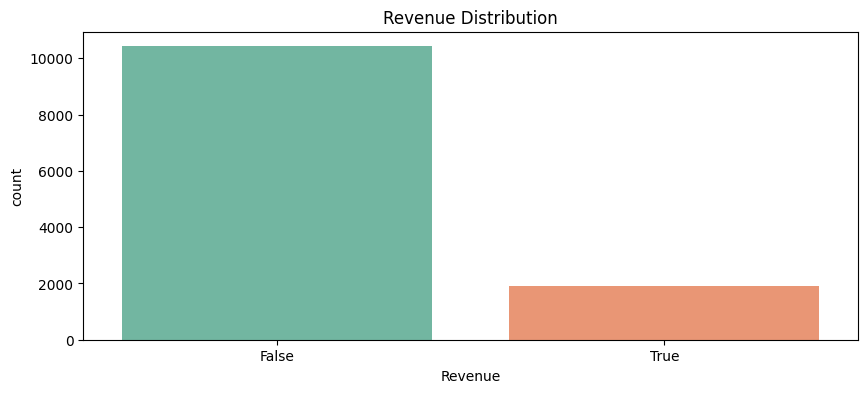

In [ ]:
# Visualizations
plt.figure(figsize=(10, 4))
sns.countplot(x='Revenue', data=data, palette='Set2')
plt.title('Revenue Distribution')
plt.show()

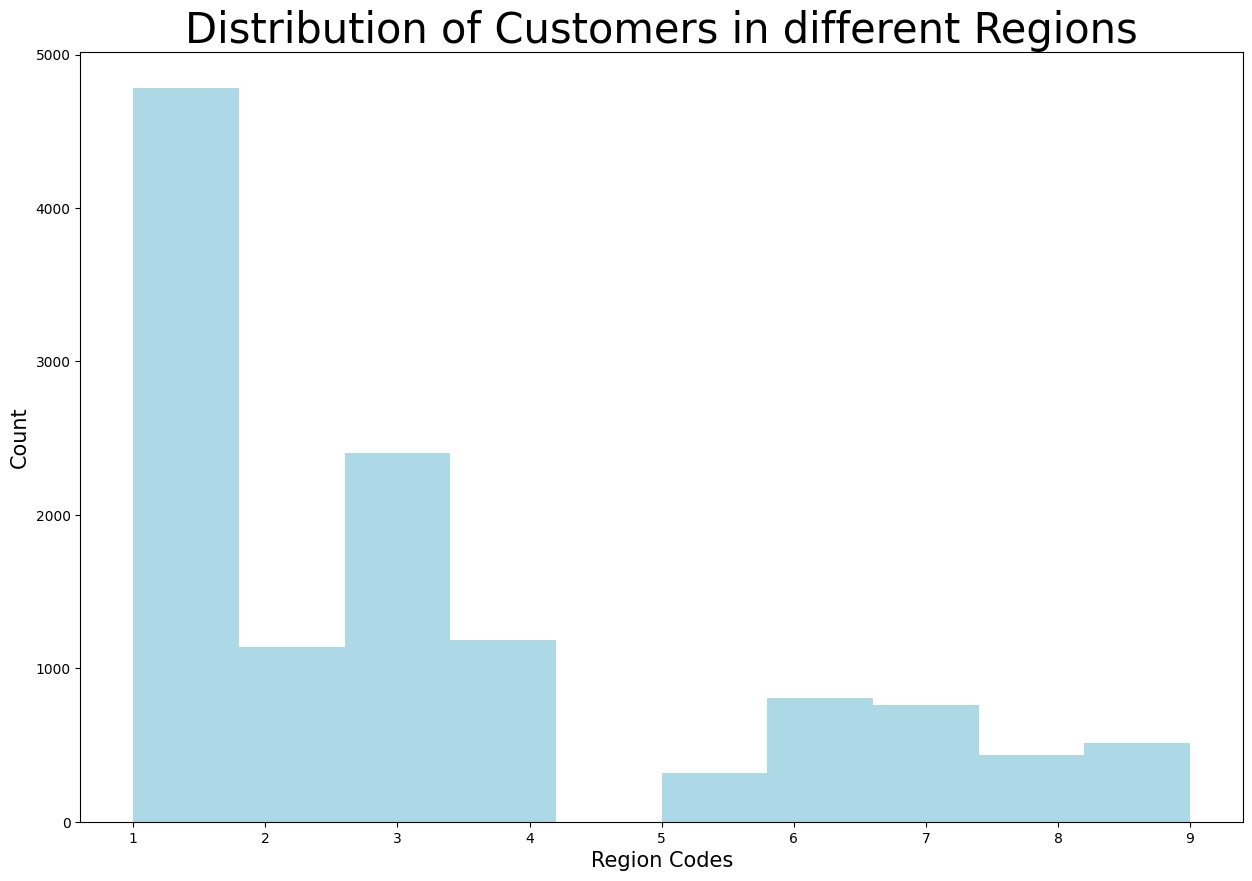

In [ ]:
# visualizing the distribution of customers around the Region

plt.rcParams['figure.figsize'] = (15, 10)
plt.hist(data['Region'], color = 'lightblue')
plt.title('Distribution of Customers in different Regions',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [ ]:
# checking different no. of browsers they use for shopping
data['Browser'].value_counts()

,count
Browser,
2,7961
1,2462
4,736
5,467
6,174
10,163
8,135
3,105
13,61


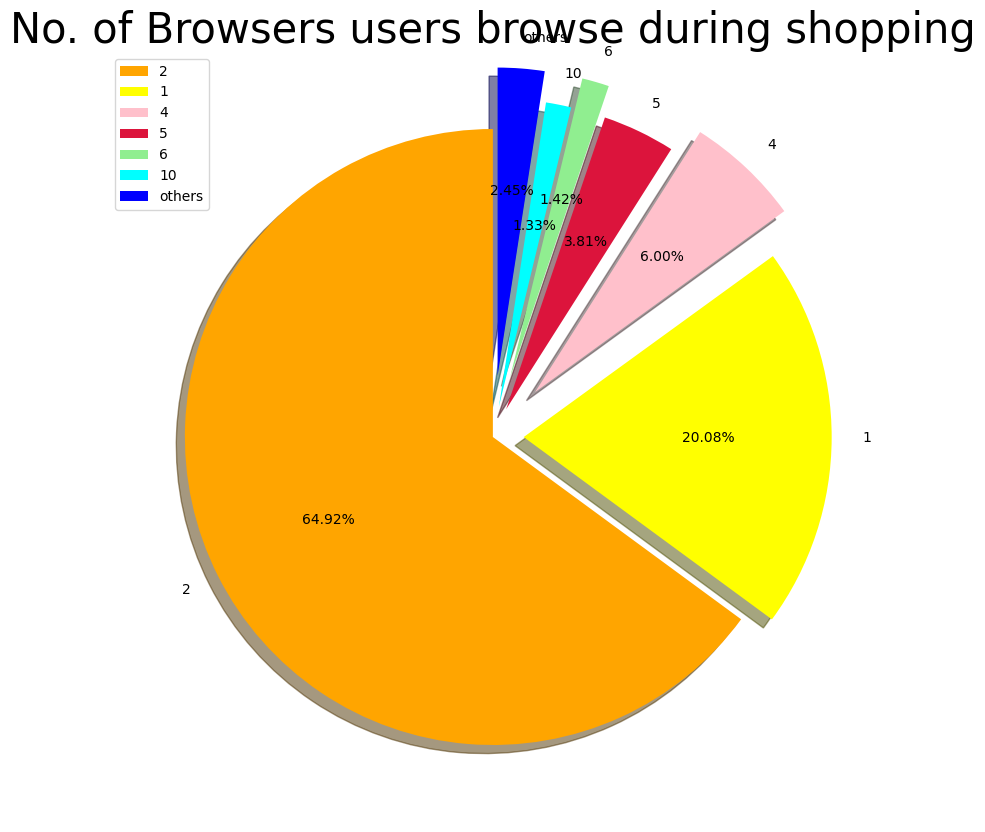

In [ ]:
# plotting a pie chart for browsers

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"
explode = [0, 0.1, 0.2, 0.1, 0.2, 0.1, 0.2]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('No. of Browsers users browse during shopping', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
# checking the no. of OSes each user is having
data['OperatingSystems'].value_counts()

,count
OperatingSystems,
2,6601
1,2585
3,2555
4,478
8,79
6,19
7,7
5,6


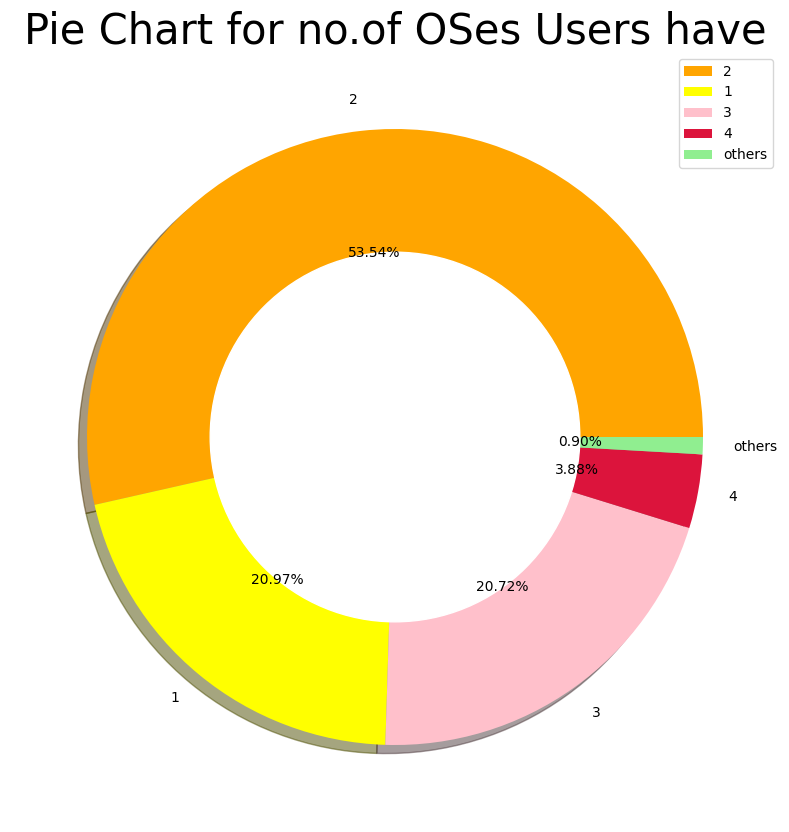

In [ ]:
# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart for no.of OSes Users have', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
#checking the months with most no.of customers visiting the online shopping sites

data['Month'].value_counts()

,count
Month,
May,3364
Nov,2998
Mar,1907
Dec,1727
Oct,549
Sep,448
Aug,433
Jul,432
June,288


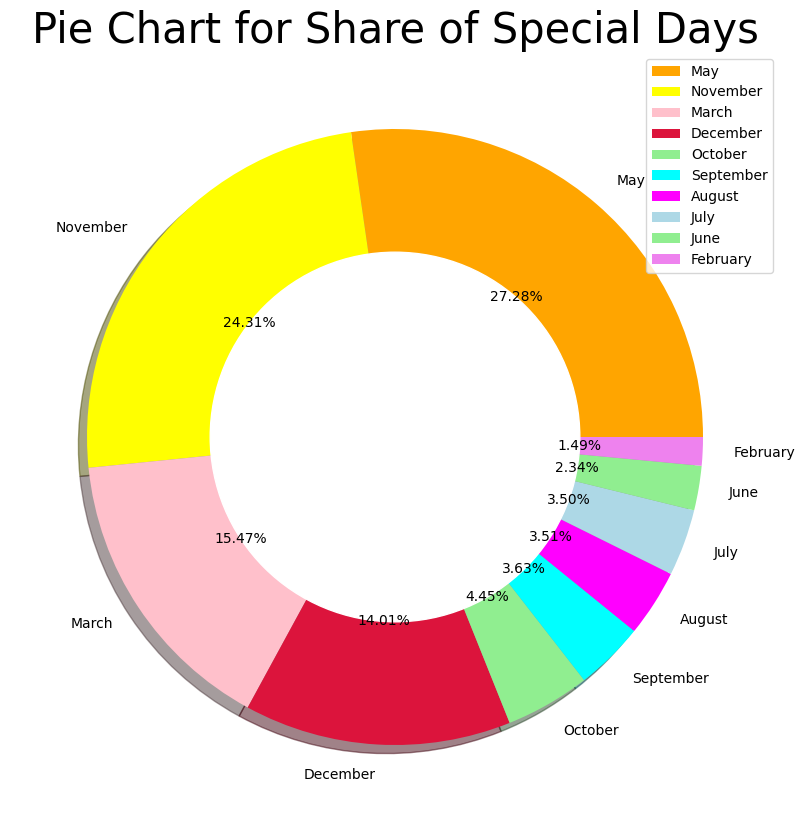

In [ ]:
# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart for Share of Special Days', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()


In [ ]:
# looking at the probabilities of special day

data['SpecialDay'].value_counts()

,count
SpecialDay,
0.0,11079
0.6,351
0.8,325
0.4,243
0.2,178
1.0,154


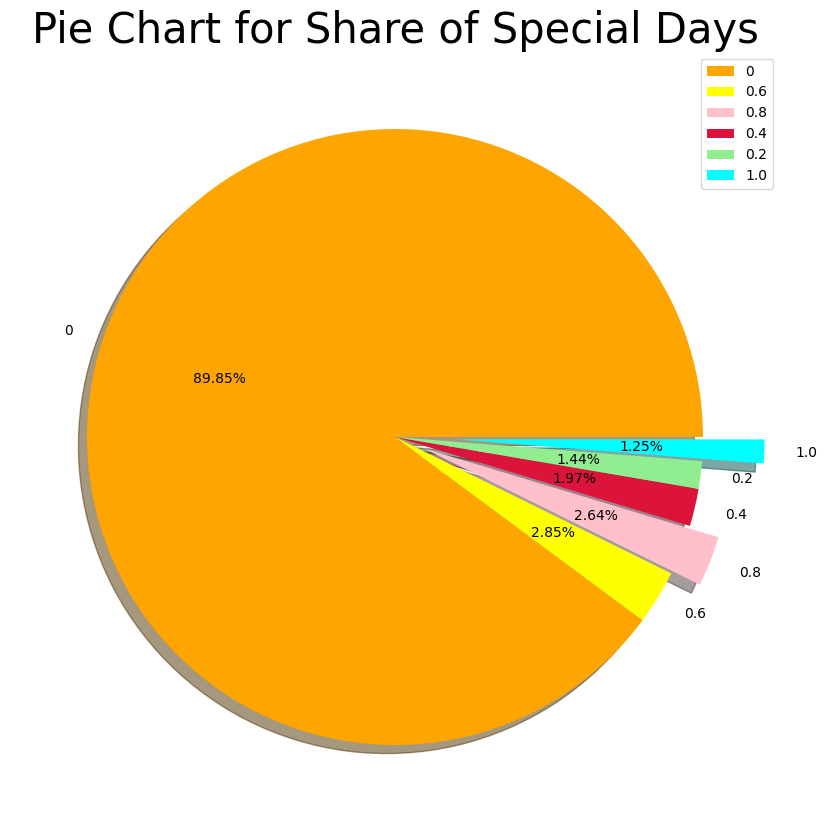

In [ ]:
# plotting a pie chart for share of special days

size = [11079, 351, 325, 243, 178, 154]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan']
labels = "0", "0.6", "0.8", "0.4", "0.2", "1.0"
explode = [0, 0, 0.1, 0, 0, 0.2]

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart for Share of Special Days', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

<ipython-input-22-9eec5b1cf8ef>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PageValues'], color = 'blue')


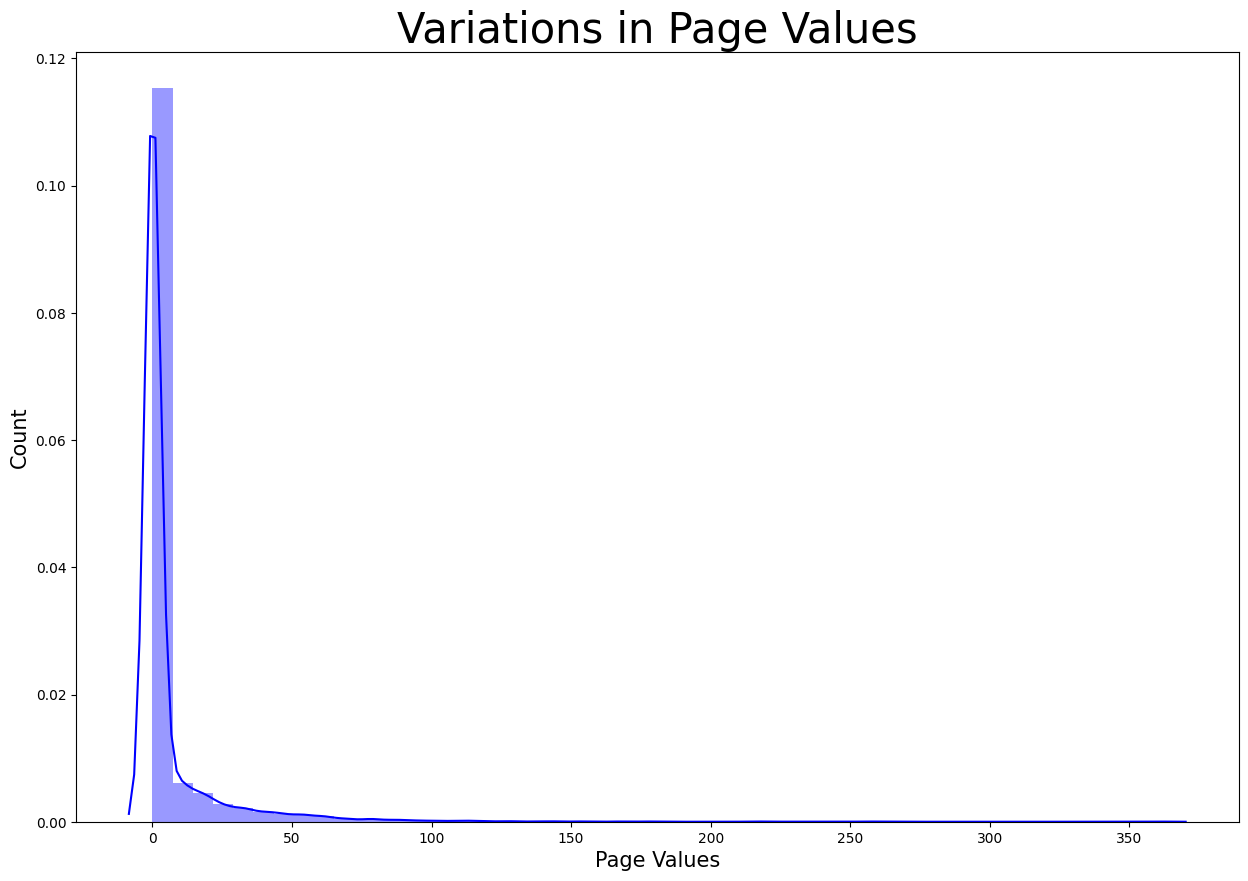

In [ ]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['PageValues'], color = 'blue')
plt.title('Variations in Page Values', fontsize = 30)
plt.xlabel('Page Values', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

<ipython-input-23-d6d7c147c8fb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ExitRates'], color = 'red')


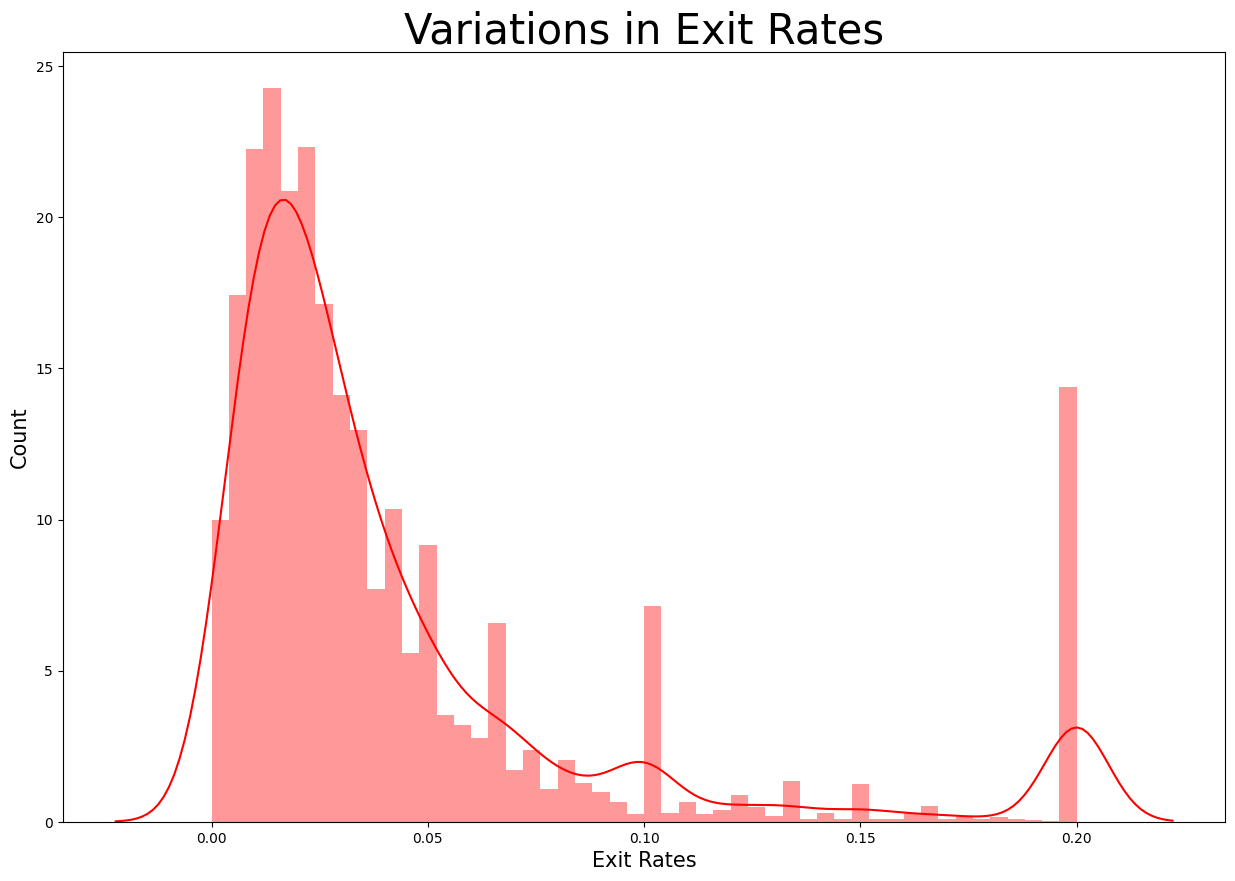

In [ ]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['ExitRates'], color = 'red')
plt.title('Variations in Exit Rates', fontsize = 30)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

<ipython-input-24-90475bb08ff7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BounceRates'], color = 'red')


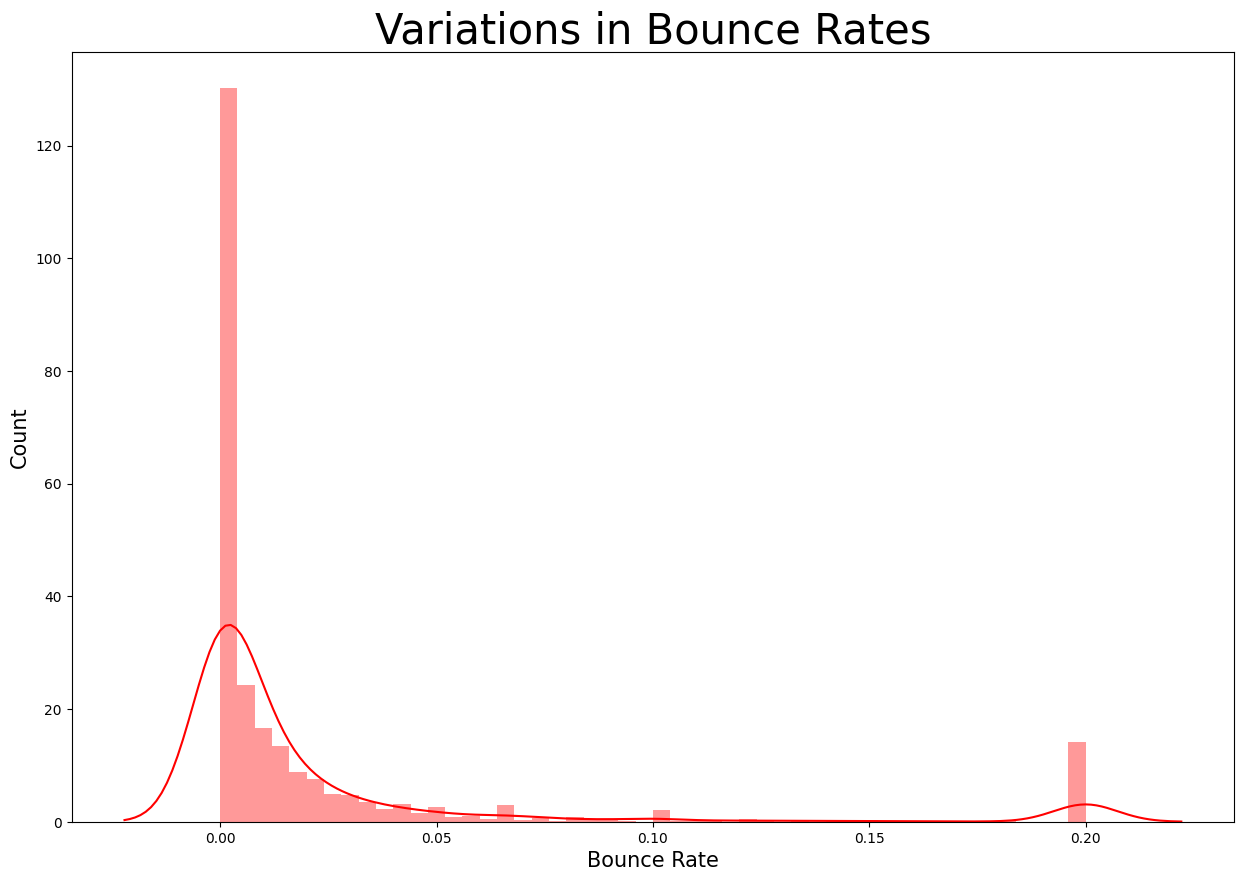

In [ ]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['BounceRates'], color = 'red')
plt.title('Variations in Bounce Rates', fontsize = 30)
plt.xlabel('Bounce Rate', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

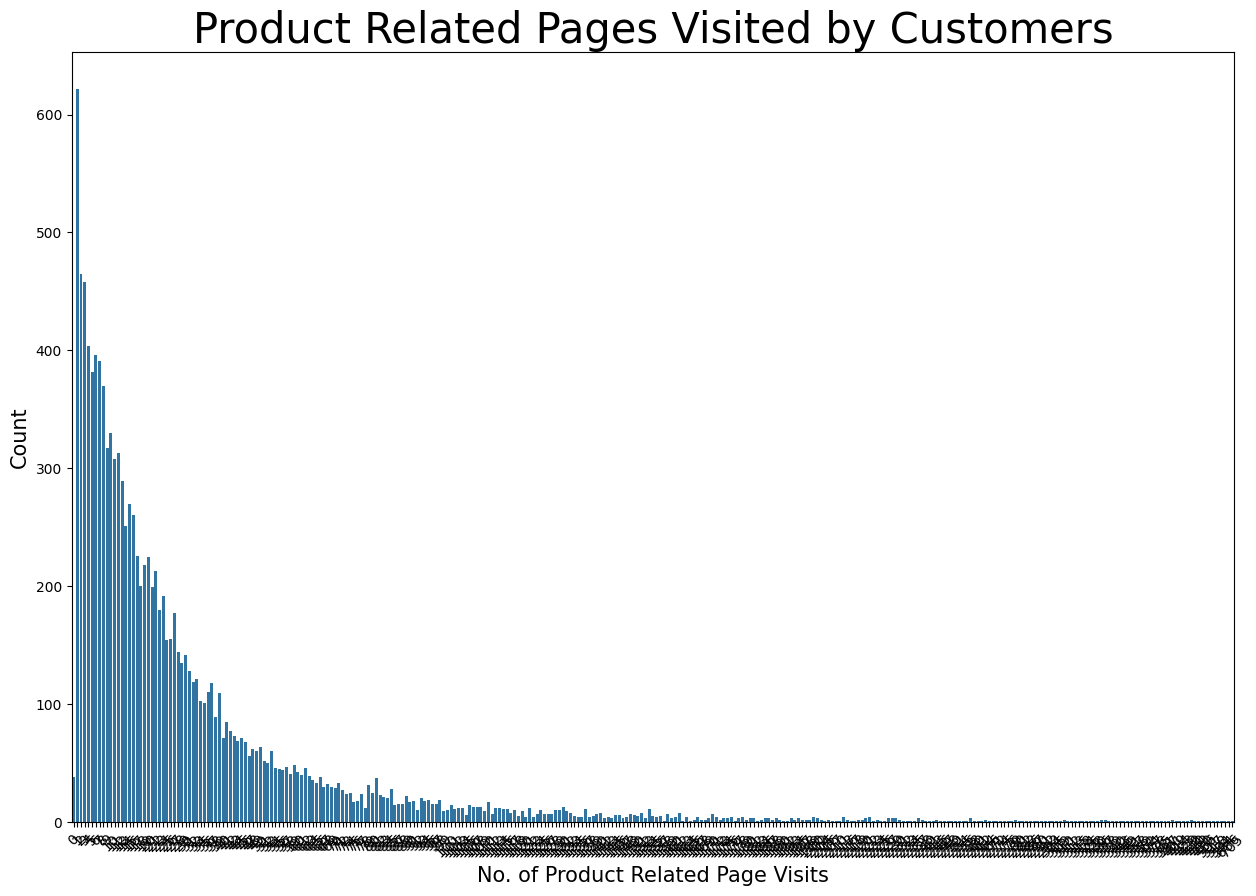

In [ ]:
# checking the variations in the administrative duration for the online shoppers

plt.figure(figsize=(15, 10))
sns.countplot(x='ProductRelated', data=data)
plt.title('Product Related Pages Visited by Customers', fontsize=30)
plt.xlabel('No. of Product Related Page Visits', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)  # Rotate x-axis labels if they're crowded
plt.show()

<ipython-input-26-24a05c0521d5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ProductRelated_Duration'], color = 'violet')


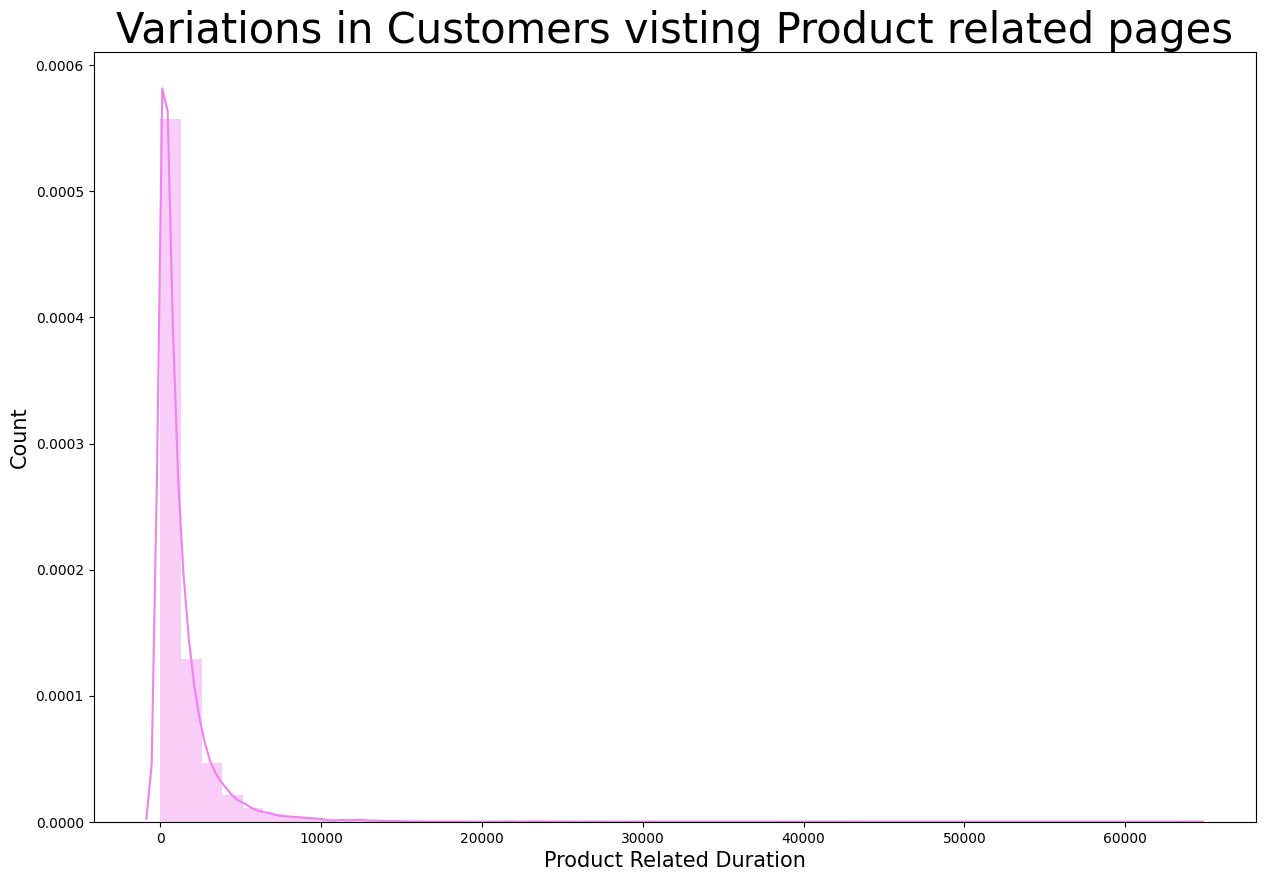

In [ ]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['ProductRelated_Duration'], color = 'violet')
plt.title('Variations in Customers visting Product related pages', fontsize = 30)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

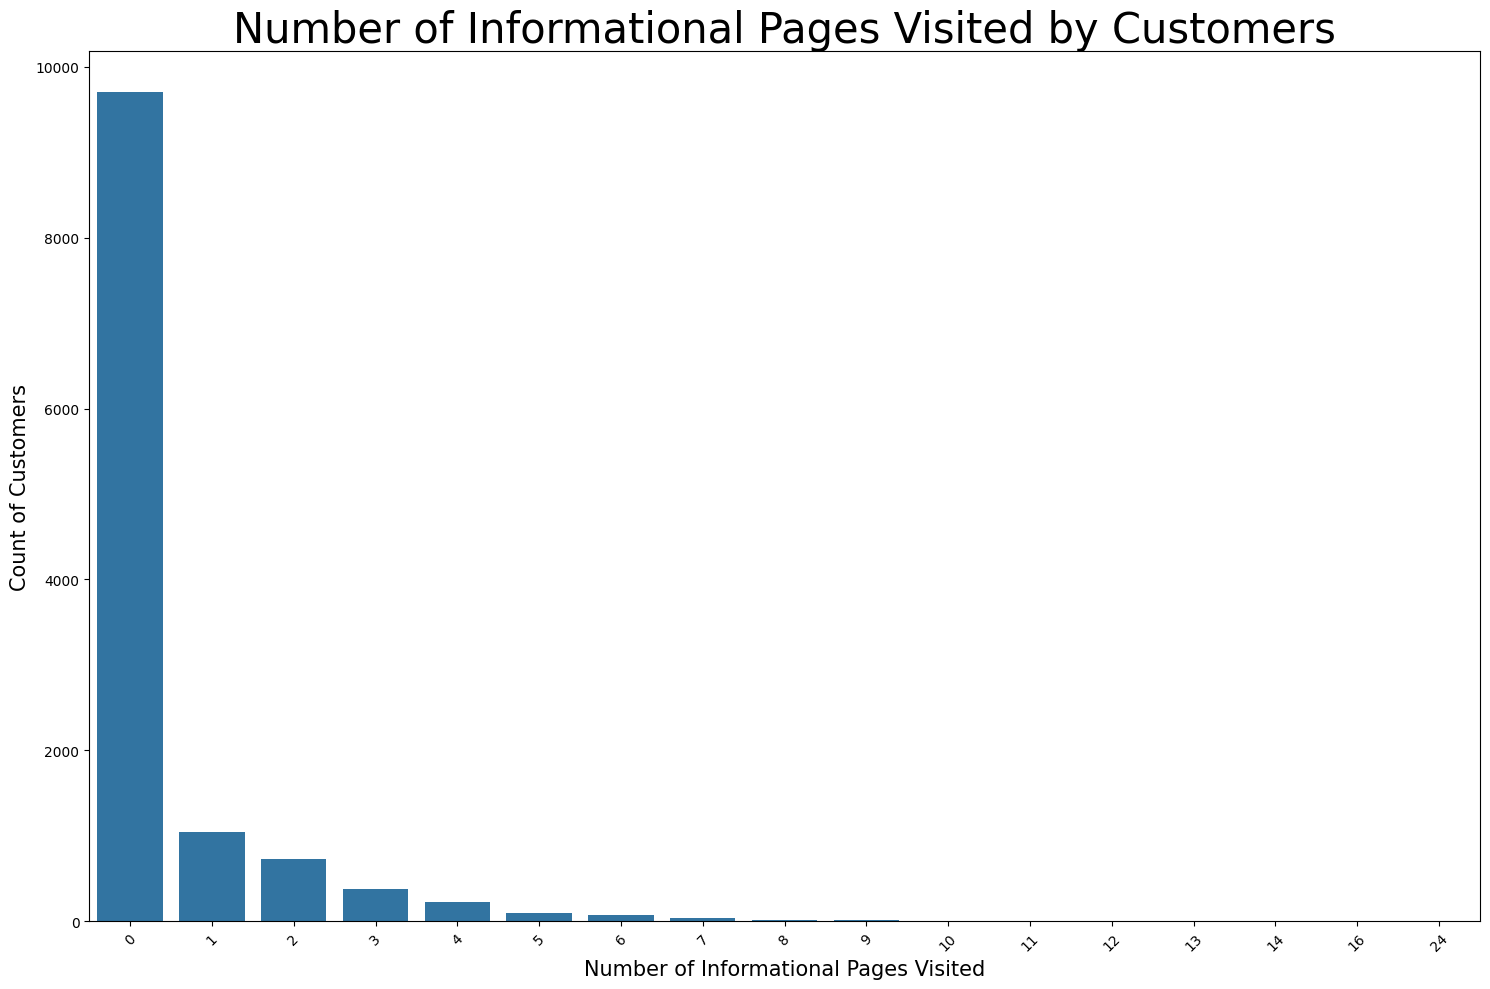

In [ ]:
# checking the variations in the administrative duration for the online shoppers

plt.figure(figsize=(15, 10))
sns.countplot(x='Informational', data=data)
plt.title('Number of Informational Pages Visited by Customers', fontsize=30)
plt.xlabel('Number of Informational Pages Visited', fontsize=15)  # Fixed label
plt.ylabel('Count of Customers', fontsize=15)
plt.xticks(rotation=45)  # Rotate labels if they're crowded
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

<ipython-input-28-6a6c0ddadefe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Informational_Duration'], color = 'yellow')


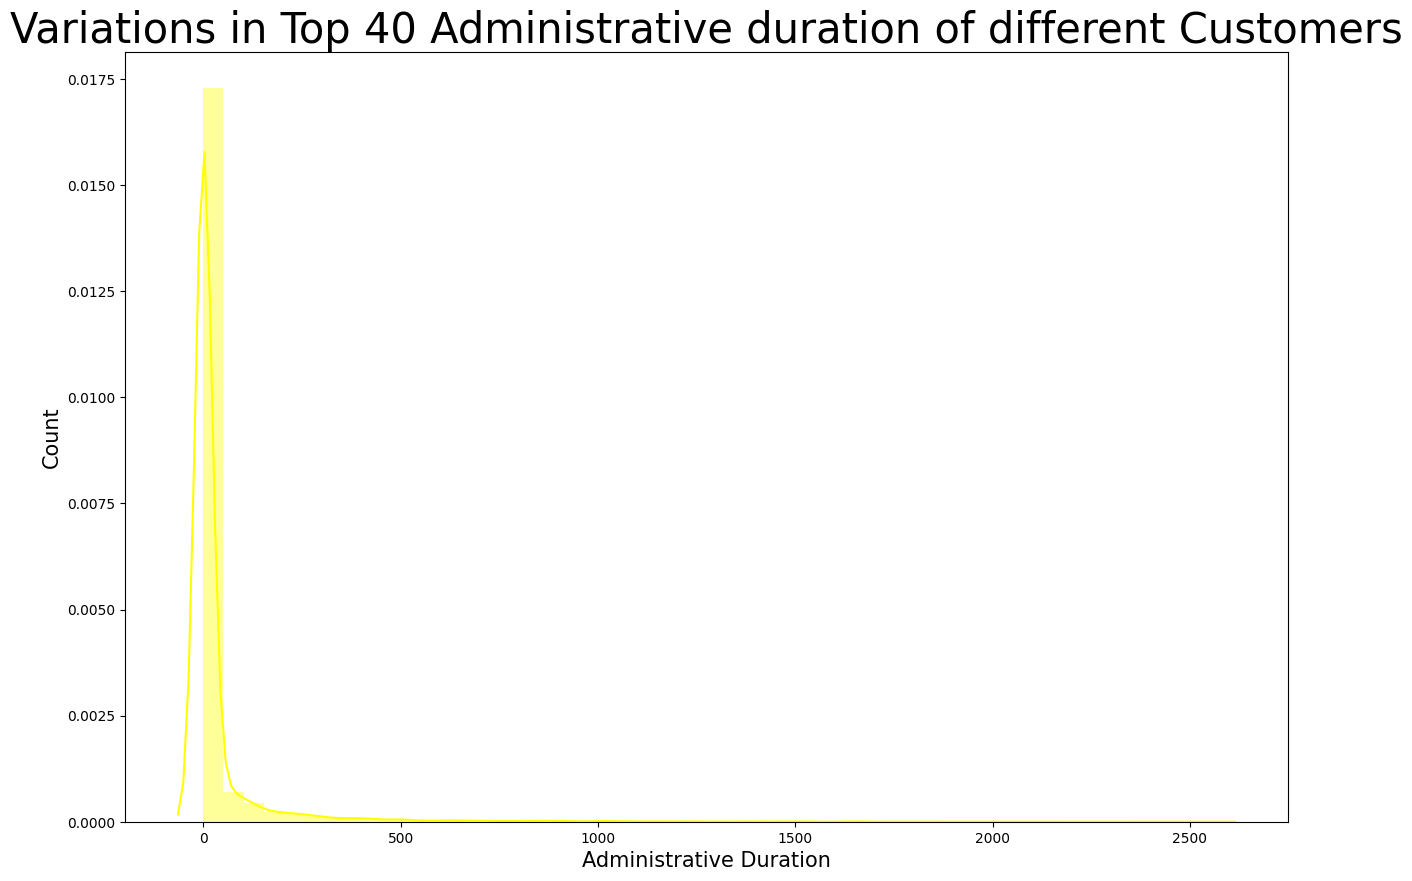

In [ ]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['Informational_Duration'], color = 'yellow')
plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('Administrative Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

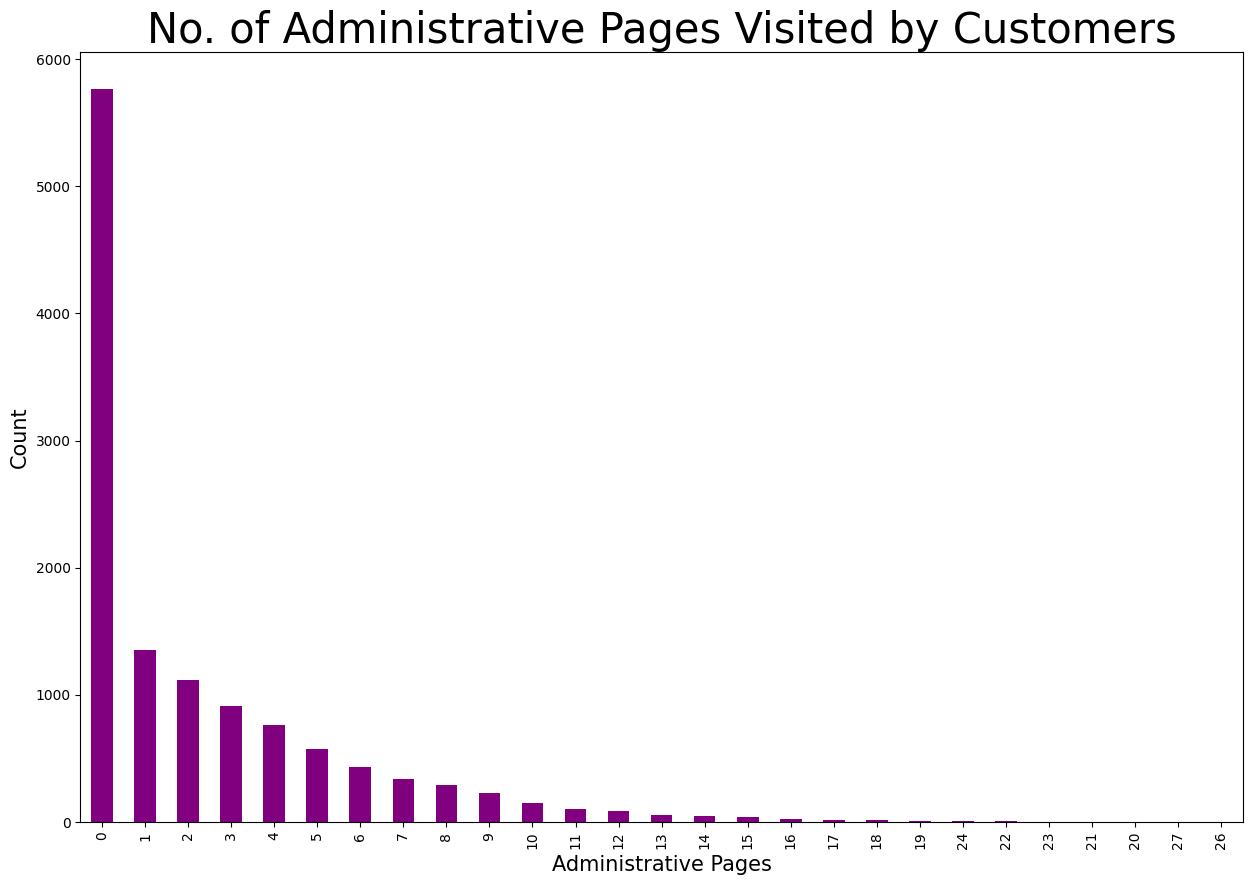

In [ ]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
data['Administrative'].value_counts().plot.bar(color = 'purple')
plt.title('No. of Administrative Pages Visited by Customers', fontsize = 30)
plt.xlabel('Administrative Pages', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

<ipython-input-30-18acd34ad98b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Administrative_Duration'], color = 'violet')


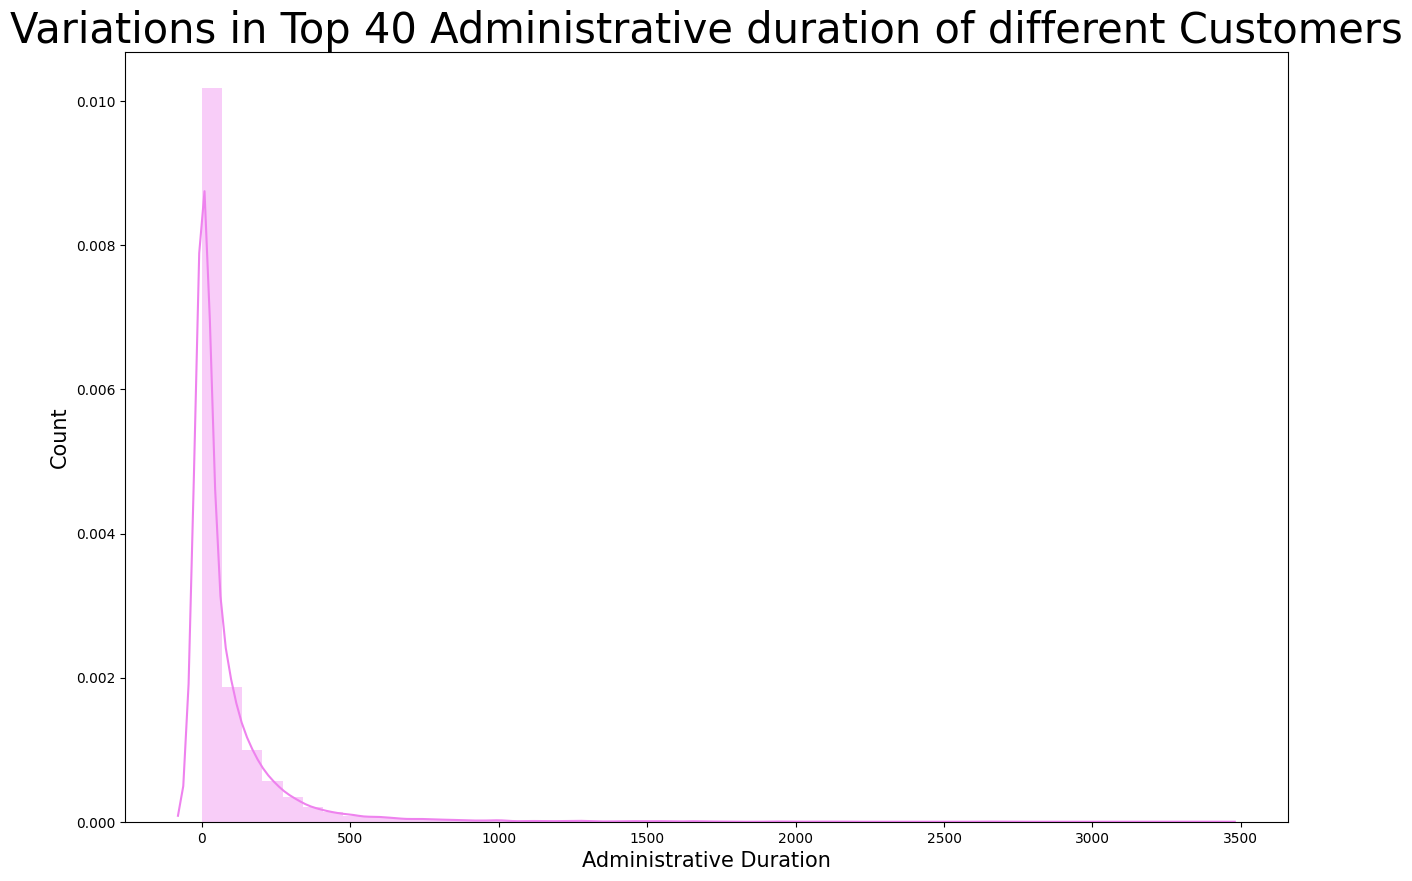

In [ ]:
# checking the variations in the administrative duration for the online shoppers

plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(data['Administrative_Duration'], color = 'violet')
plt.title('Variations in Top 40 Administrative duration of different Customers', fontsize = 30)
plt.xlabel('Administrative Duration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

<ipython-input-31-f3c5be7c3700>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['Revenue'], y=data['Informational_Duration'], palette='colorblind')


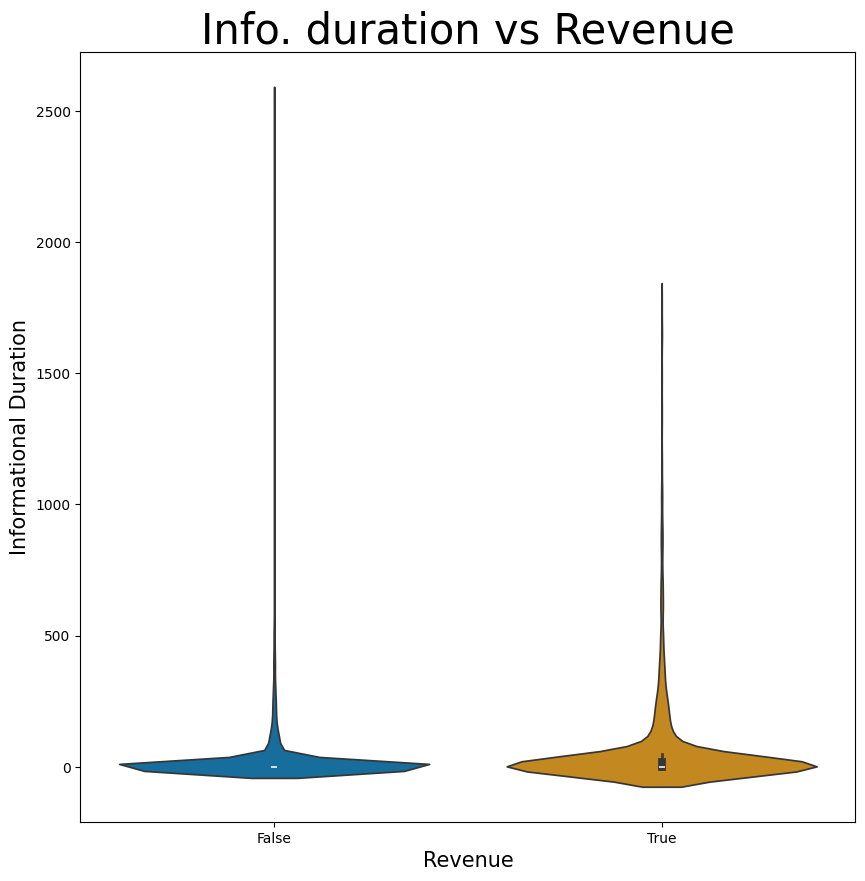

In [ ]:
# product related duration vs revenue
plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(x=data['Revenue'], y=data['Informational_Duration'], palette='colorblind')
plt.title('Info. duration vs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Informational Duration', fontsize=15)
plt.show()

<ipython-input-32-649219f2f03c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['Revenue'], y=data['Administrative_Duration'], palette='pastel')


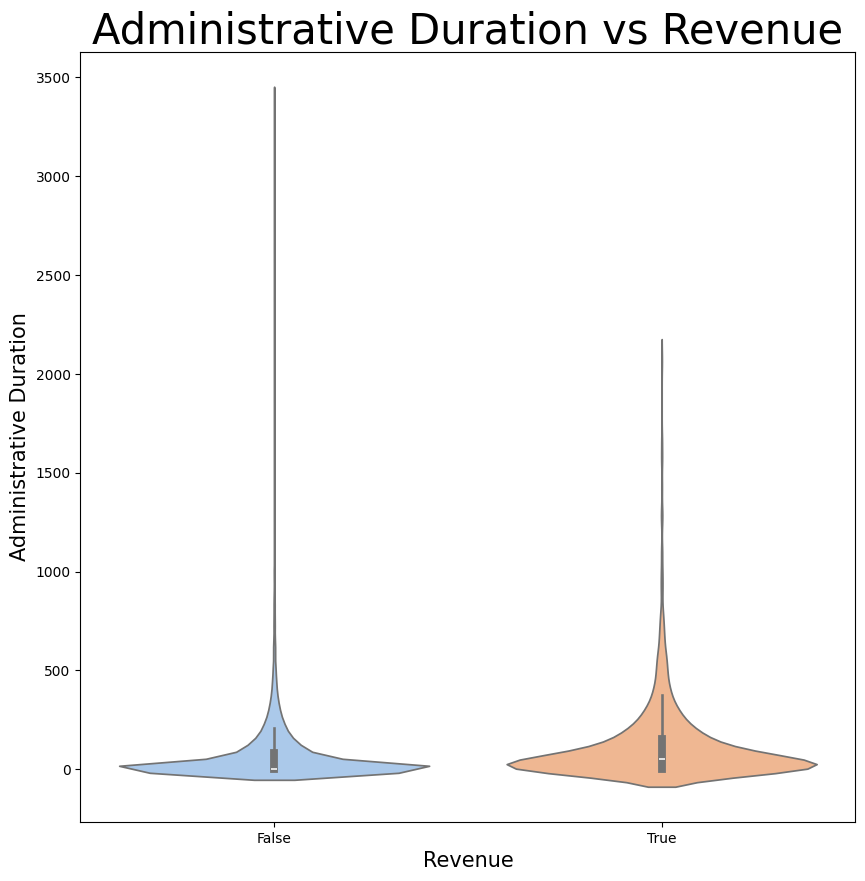

In [ ]:
# product related duration vs revenue
plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(x=data['Revenue'], y=data['Administrative_Duration'], palette='pastel')
plt.title('Administrative Duration vs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Administrative Duration', fontsize=15)
plt.show()

<ipython-input-33-96f023175a7c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['Revenue'], y=data['ProductRelated_Duration'], palette='dark')


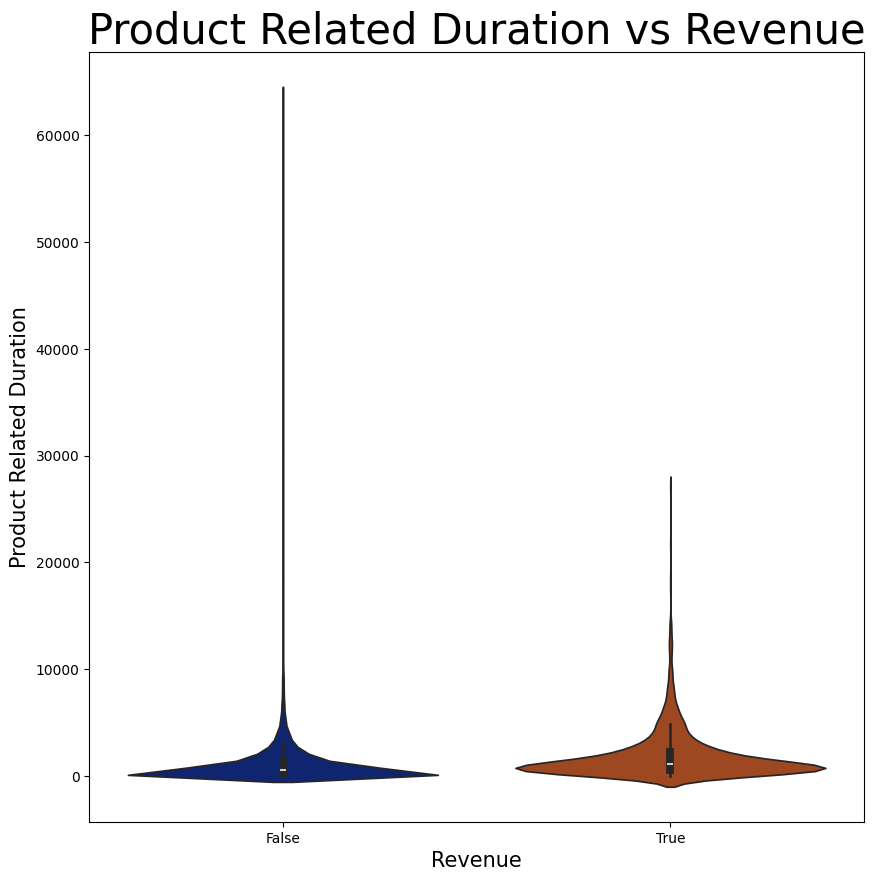

In [ ]:
# product related duration vs revenue

plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(x=data['Revenue'], y=data['ProductRelated_Duration'], palette='dark')
plt.title('Product Related Duration vs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Product Related Duration', fontsize=15)
plt.show()

<ipython-input-34-43ecfddf8d68>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Revenue'], y=data['ExitRates'], palette='dark')


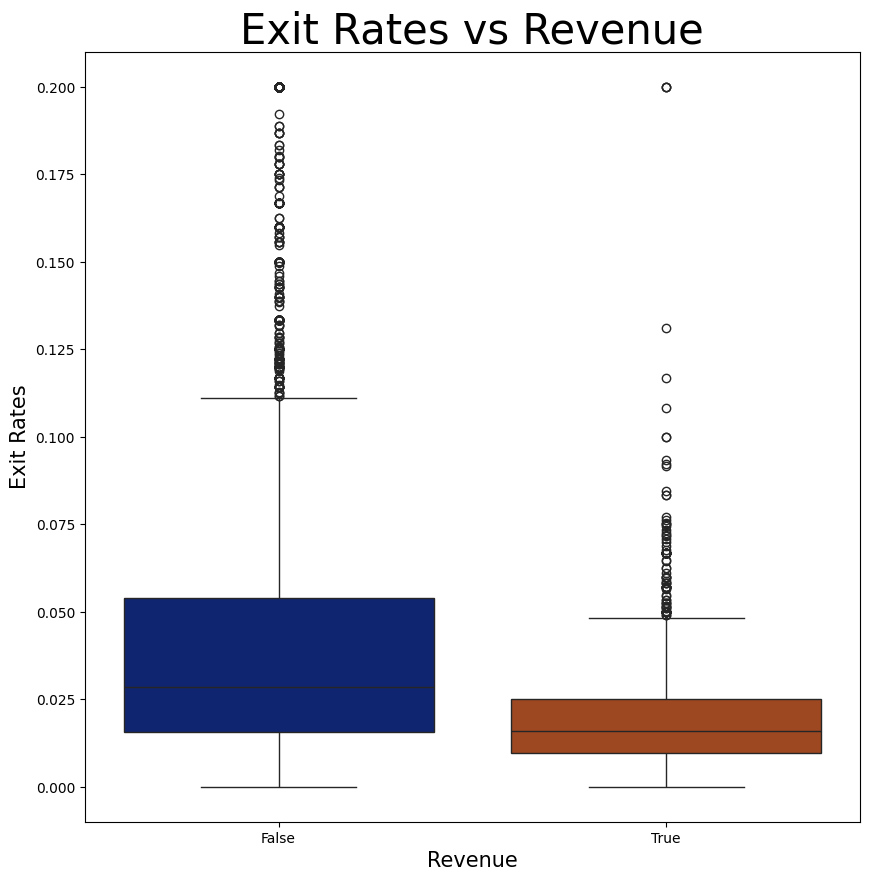

In [ ]:
# exit rate vs revenue
plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(x=data['Revenue'], y=data['ExitRates'], palette='dark')
plt.title('Exit Rates vs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Exit Rates', fontsize=15)
plt.show()

<ipython-input-35-9bb4b606906f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Revenue'], y=data['PageValues'], palette='pastel')


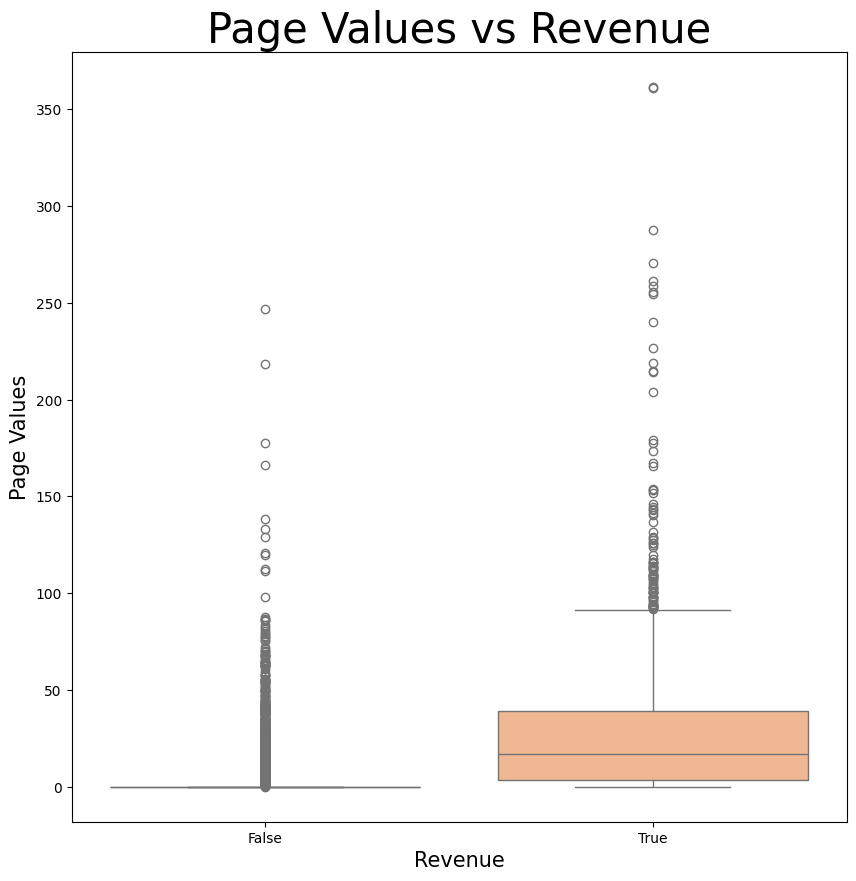

In [ ]:
# page values vs revenue
plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(x=data['Revenue'], y=data['PageValues'], palette='pastel')
plt.title('Page Values vs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Page Values', fontsize=15)
plt.show()

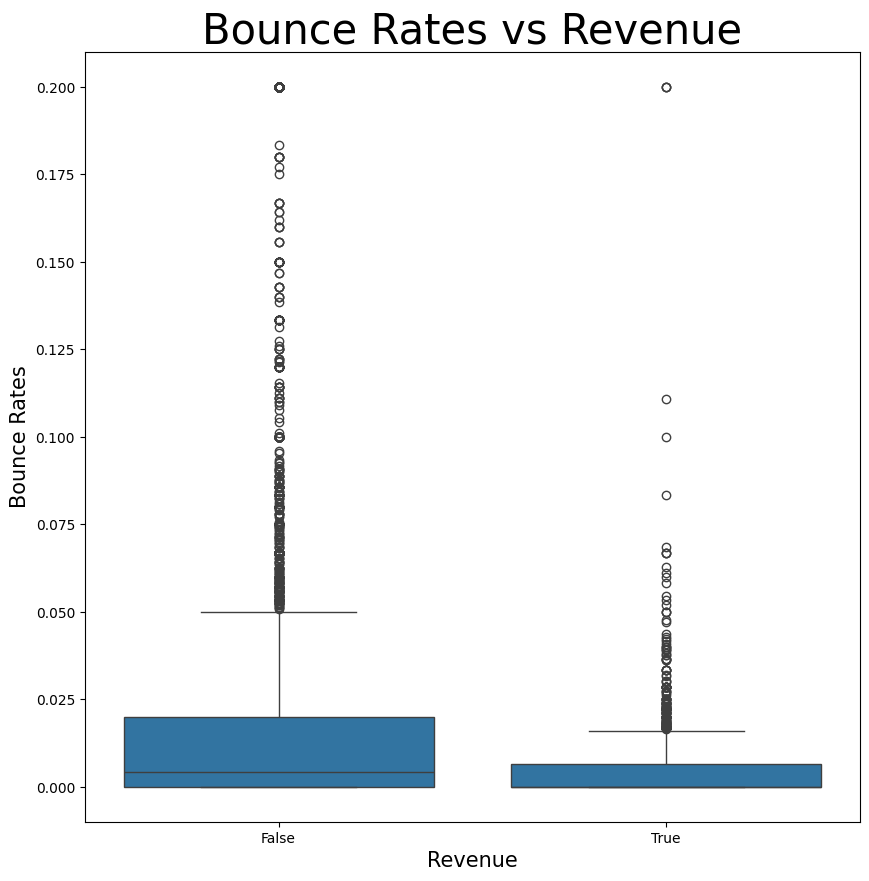

In [ ]:
# bounce rates vs revenue
plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(x=data['Revenue'], y=data['BounceRates'])
plt.title('Bounce Rates vs Revenue', fontsize=30)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Bounce Rates', fontsize=15)
plt.show()

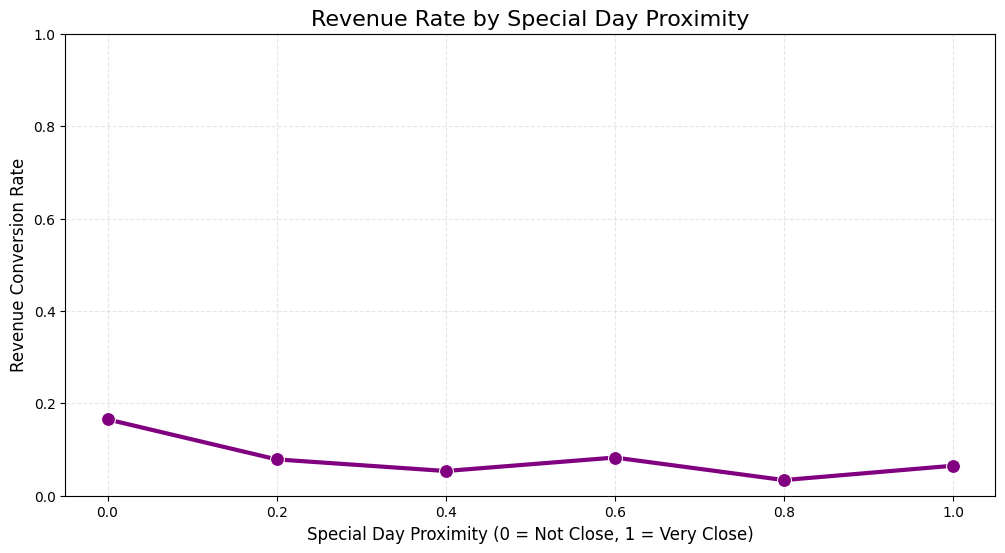

In [ ]:
# specialday vs revenue
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='SpecialDay',
    y='Revenue',
    data=data.groupby('SpecialDay')['Revenue'].mean().reset_index(),
    marker='o',
    markersize=10,
    linewidth=3,
    color='purple'
)
plt.title('Revenue Rate by Special Day Proximity', fontsize=16)
plt.xlabel('Special Day Proximity (0 = Not Close, 1 = Very Close)', fontsize=12)
plt.ylabel('Revenue Conversion Rate', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.ylim(0, 1)  # Since Revenue is binary (0/1)
plt.show()

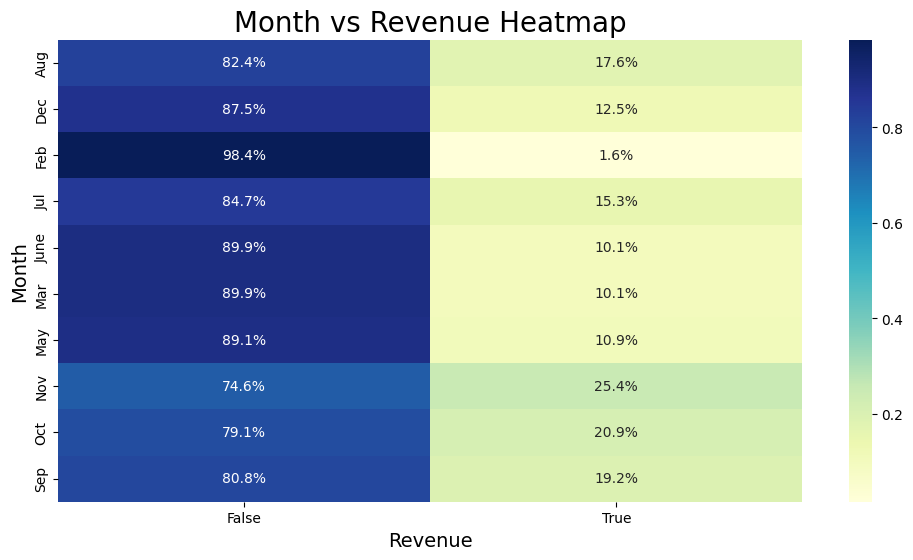

In [ ]:
# months vs revenue

# Heatmap version
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(data['Month'], data['Revenue'], normalize='index'),
            annot=True, fmt='.1%', cmap='YlGnBu')
plt.title('Month vs Revenue Heatmap', fontsize=20)
plt.ylabel('Month', fontsize=14)
plt.xlabel('Revenue', fontsize=14)
plt.show()

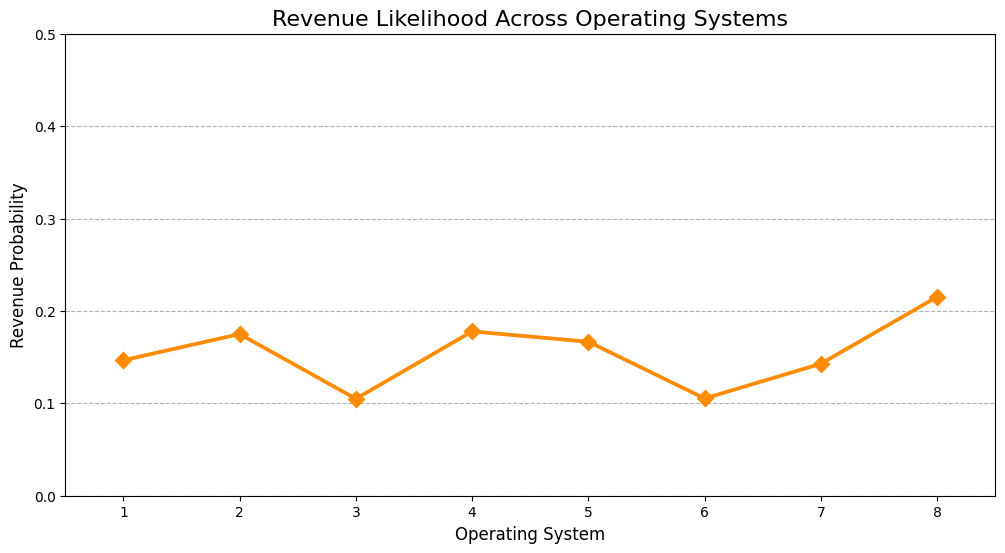

In [ ]:
# operating system vs Revenue

plt.figure(figsize=(12, 6))
sns.pointplot(
    x='OperatingSystems',
    y='Revenue',
    data=data,
    capsize=0.1,
    color='darkorange',
    errorbar=None,
    markers='D'
)
plt.title('Revenue Likelihood Across Operating Systems', fontsize=16)
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Revenue Probability', fontsize=12)
plt.ylim(0, 0.5)  # Adjust based on your data range
plt.grid(axis='y', linestyle='--')
plt.show()

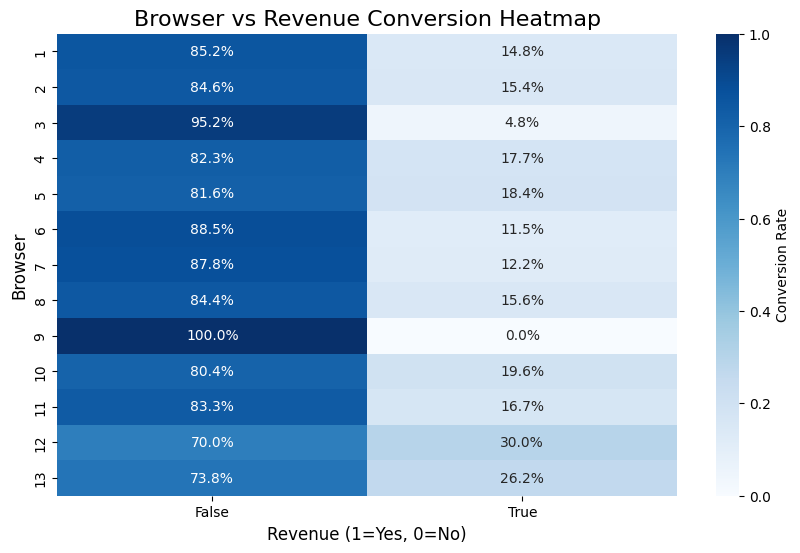

In [ ]:
# browser vs Revenue
plt.figure(figsize=(10, 6))
sns.heatmap(
    pd.crosstab(data['Browser'], data['Revenue'], normalize='index'),
    annot=True,
    fmt='.1%',
    cmap='Blues',
    cbar_kws={'label': 'Conversion Rate'}
)
plt.title('Browser vs Revenue Conversion Heatmap', fontsize=16)
plt.xlabel('Revenue (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Browser', fontsize=12)
plt.xticks(rotation=0)
plt.show()

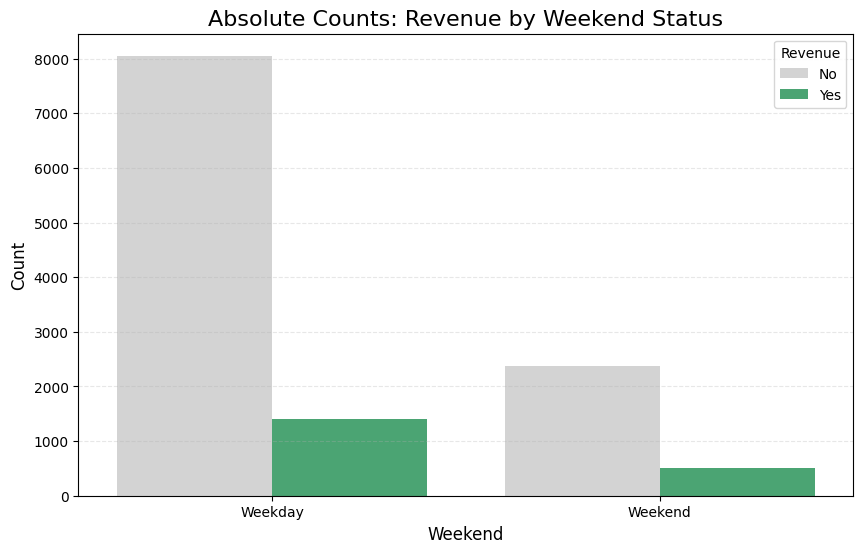

In [ ]:
# weekend vs Revenue

plt.figure(figsize=(10, 6))
sns.countplot(
    x='Weekend',
    hue='Revenue',
    data=data,
    palette={0: 'lightgray', 1: 'mediumseagreen'}
)
plt.title('Absolute Counts: Revenue by Weekend Status', fontsize=16)
plt.xlabel('Weekend', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.legend(title='Revenue', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

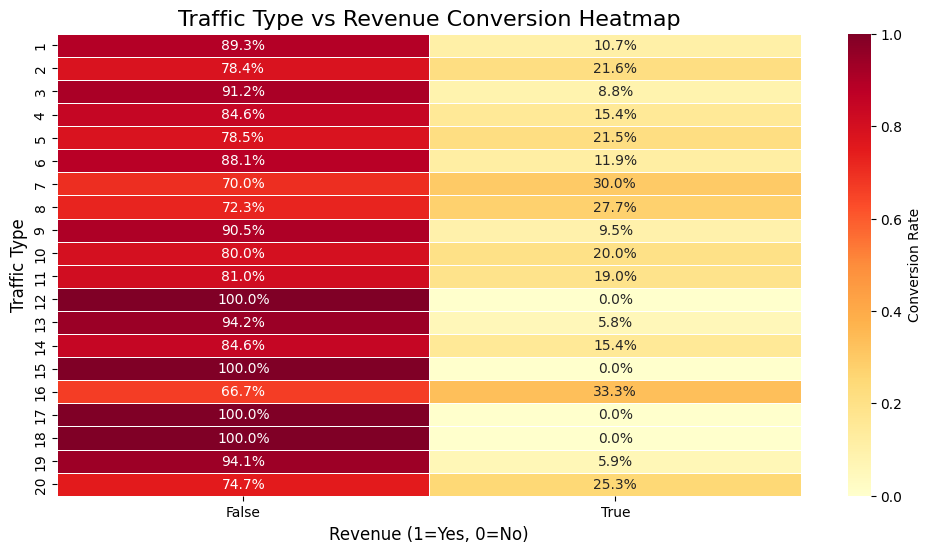

In [ ]:
# Traffic Type vs Revenue

plt.figure(figsize=(12, 6))
sns.heatmap(
    pd.crosstab(data['TrafficType'], data['Revenue'], normalize='index'),
    annot=True,
    fmt='.1%',
    cmap='YlOrRd',
    cbar_kws={'label': 'Conversion Rate'},
    linewidths=0.5
)
plt.title('Traffic Type vs Revenue Conversion Heatmap', fontsize=16)
plt.xlabel('Revenue (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Traffic Type', fontsize=12)
plt.xticks(rotation=0)
plt.show()

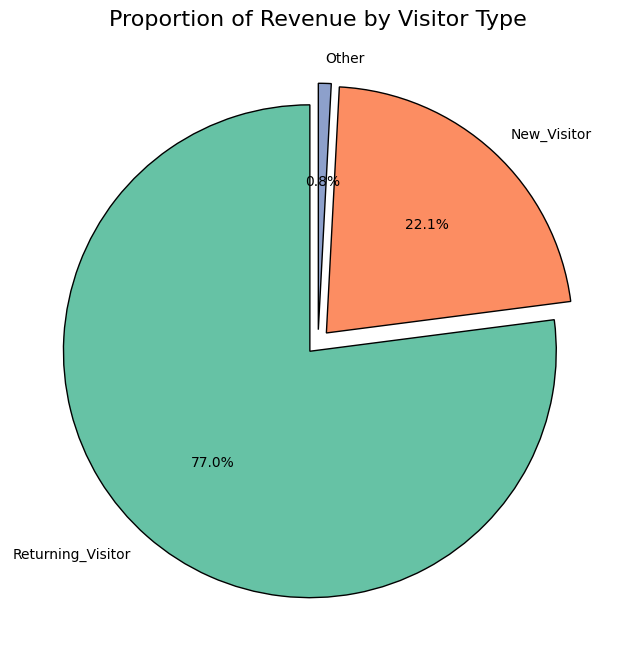

In [ ]:
# visitor type vs revenue

# Filter only revenue-generating visits
revenue_visitors = data[data['Revenue'] == 1]['VisitorType'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(revenue_visitors,
        labels=revenue_visitors.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66c2a5', '#fc8d62', '#8da0cb'],  # Colorblind-friendly
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        explode=[0.05] * len(revenue_visitors))  # Separate slices slightly
plt.title('Proportion of Revenue by Visitor Type', fontsize=16)
plt.show()

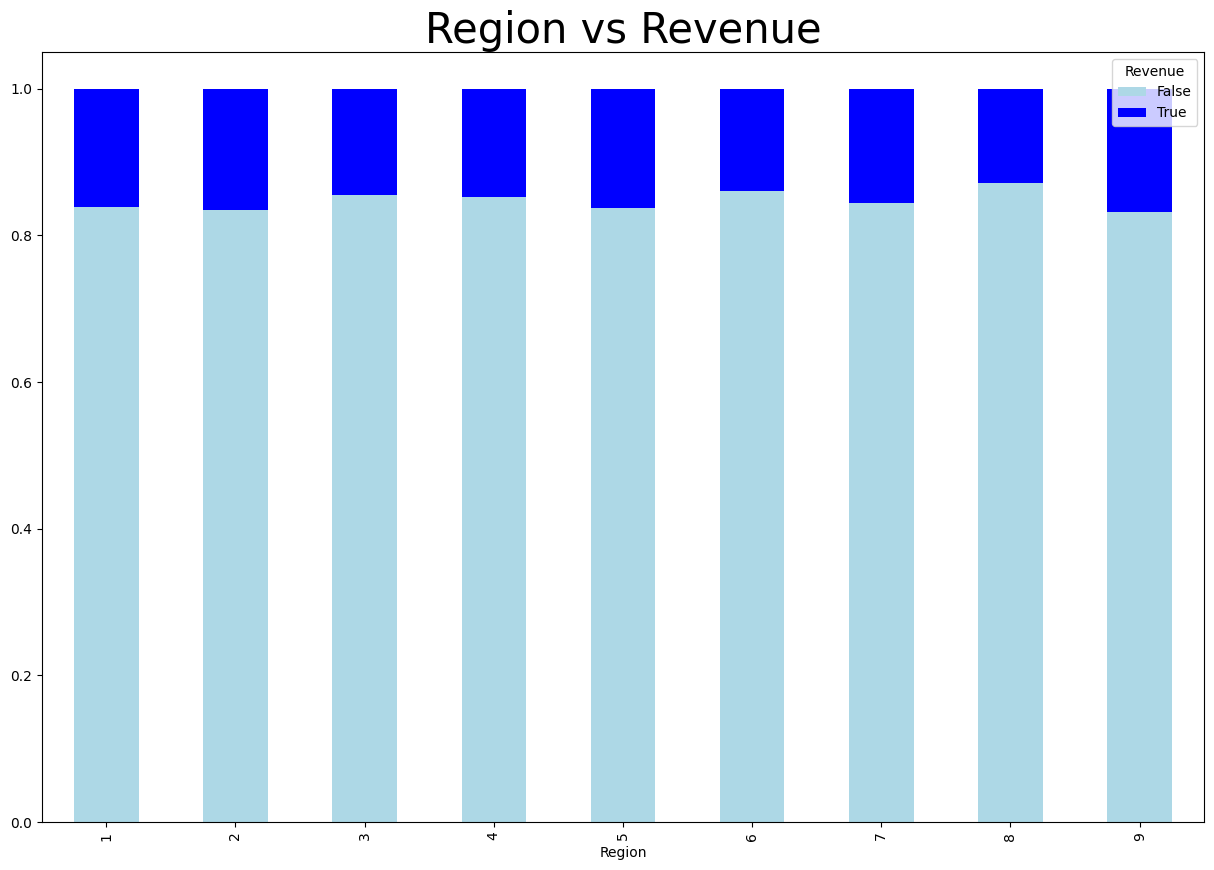

In [ ]:
# region vs Revenue

df = pd.crosstab(data['Region'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

# **LM plot ( Linear Model plot) in Seaborn**

Text(0.5, 1.0, 'LM Plot between Admistrative and Information')

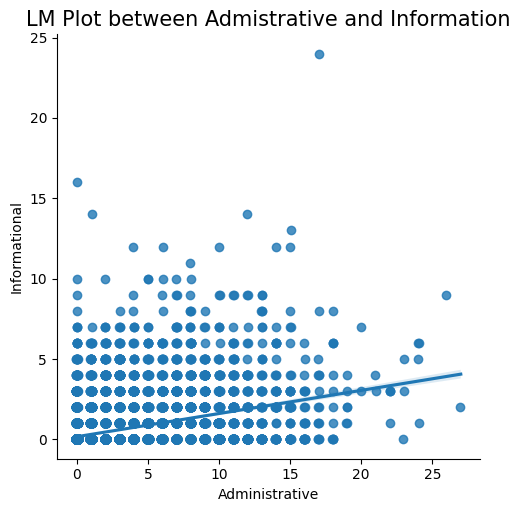

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)

sns.lmplot(x = 'Administrative', y = 'Informational', data = data, x_jitter = 0.05)
plt.title('LM Plot between Admistrative and Information', fontsize = 15)

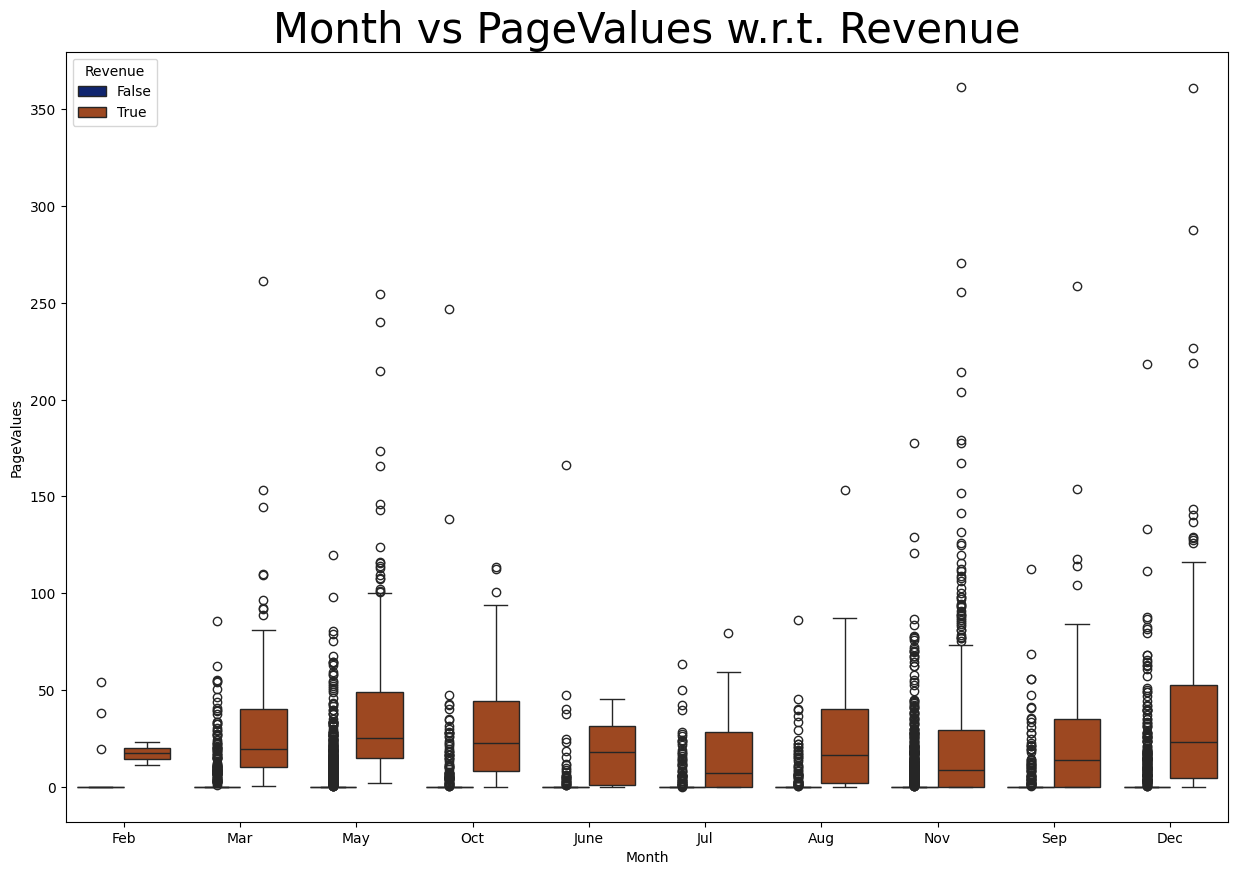

In [ ]:
# month vs pagevalues wrt revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(x = data['Month'], y = data['PageValues'], hue = data['Revenue'], palette = 'dark')
plt.title('Month vs PageValues w.r.t. Revenue', fontsize = 30)
plt.show()

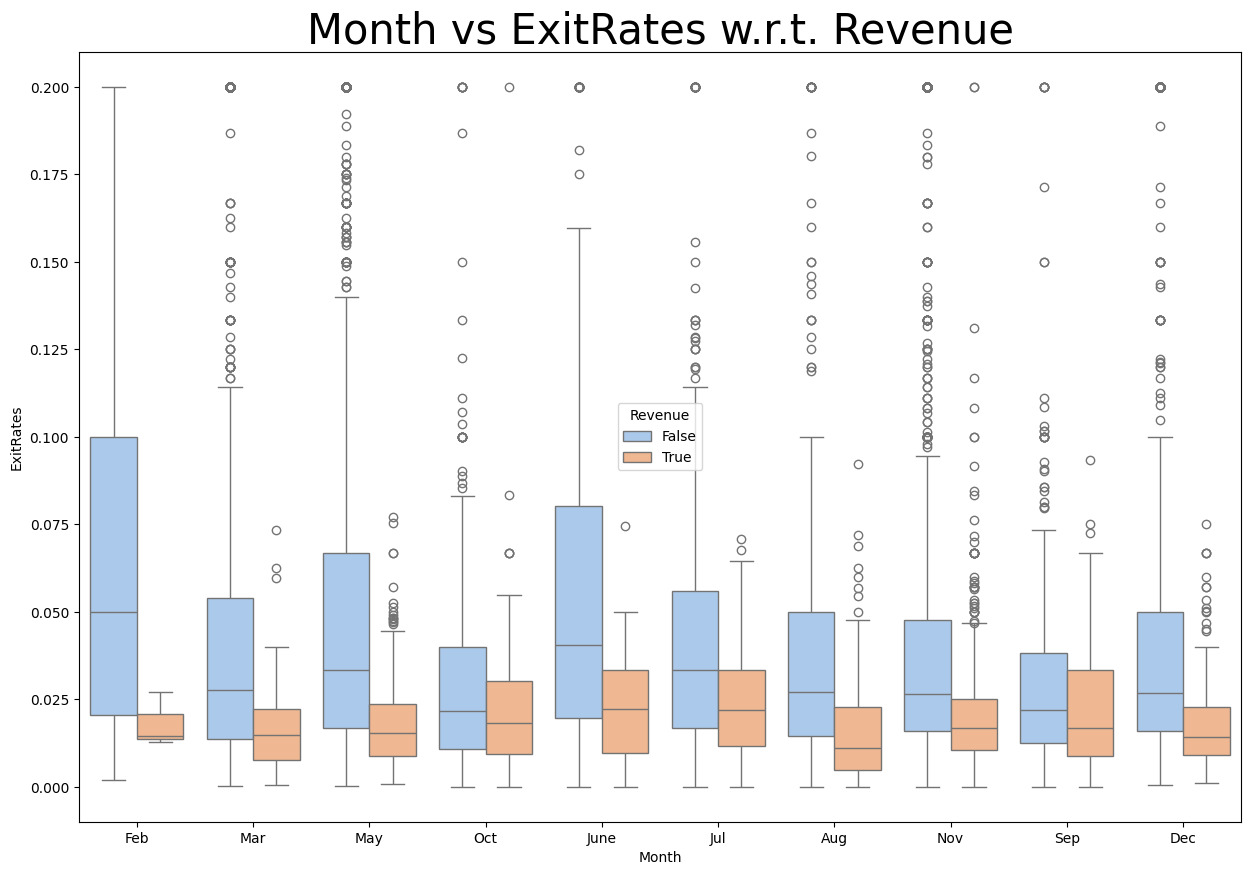

In [ ]:
# month vs exitrates wrt revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(x = data['Month'], y = data['ExitRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('Month vs ExitRates w.r.t. Revenue', fontsize = 30)
plt.show()

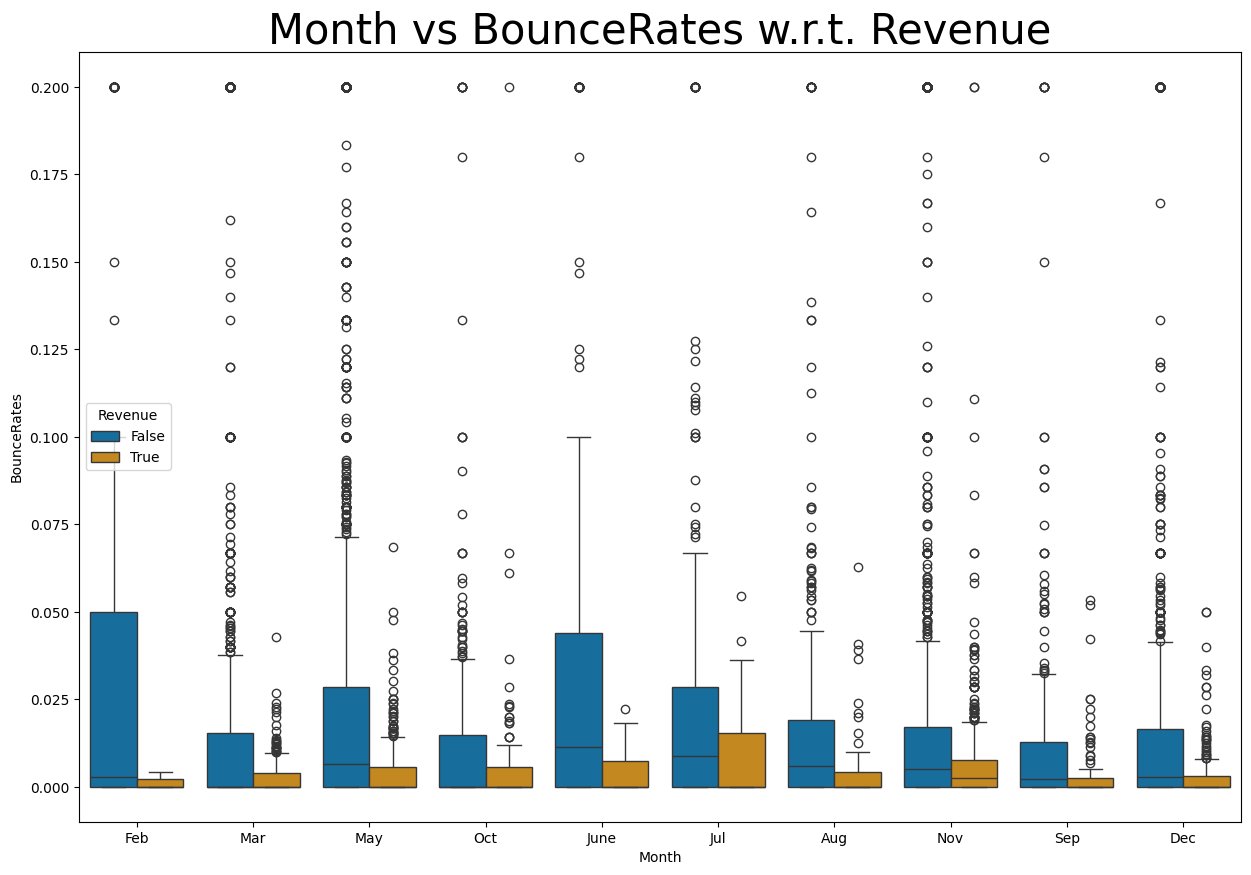

In [ ]:
# month vs bouncerates wrt revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(x = data['Month'], y = data['BounceRates'], hue = data['Revenue'], palette = 'colorblind')
plt.title('Month vs BounceRates w.r.t. Revenue', fontsize = 30)
plt.show()

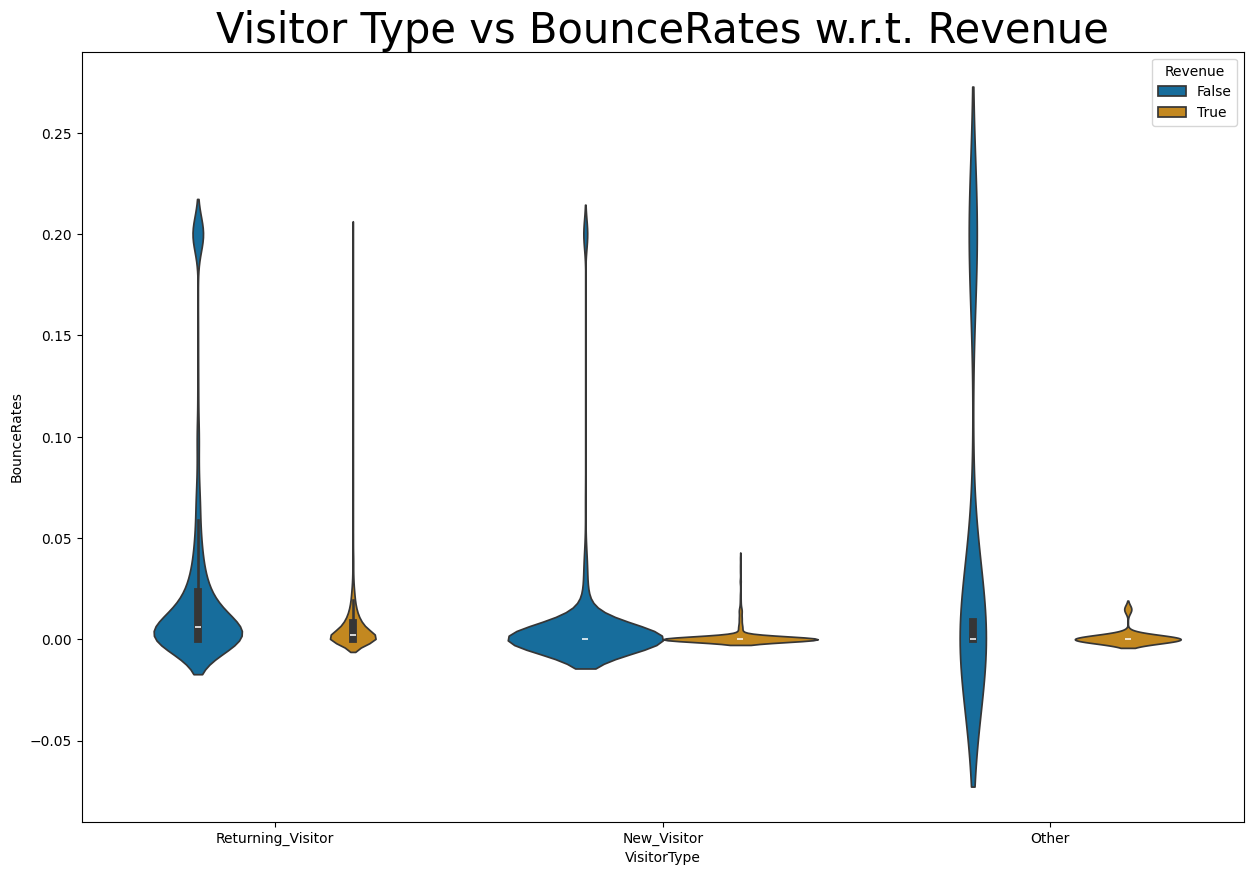

In [ ]:
# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.violinplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'colorblind')
plt.title('Visitor Type vs BounceRates w.r.t. Revenue', fontsize = 30)
plt.show()

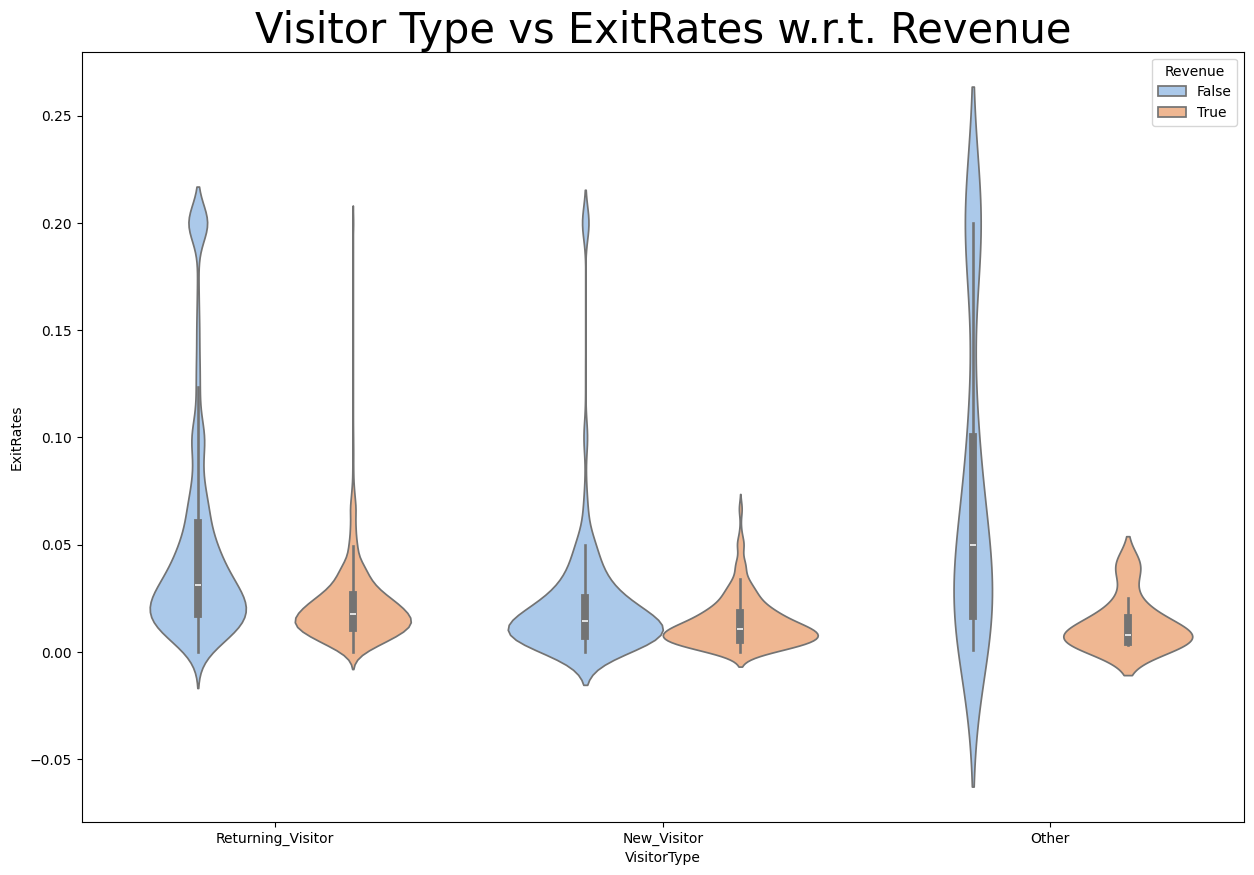

In [ ]:
# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.violinplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('Visitor Type vs ExitRates w.r.t. Revenue', fontsize = 30)
plt.show()

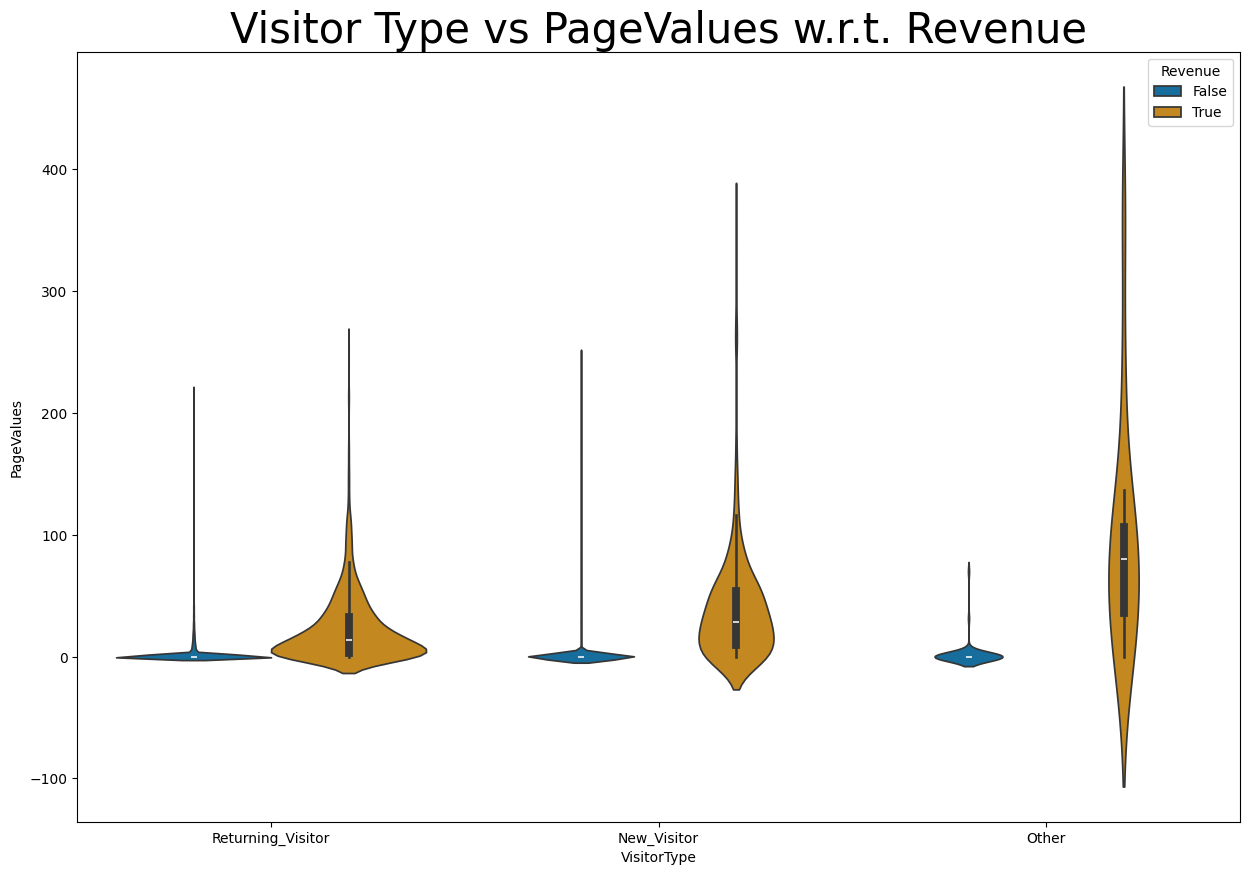

In [ ]:
# visitor type vs exit rates w.r.t revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.violinplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'colorblind')
plt.title('Visitor Type vs PageValues w.r.t. Revenue', fontsize = 30)
plt.show()

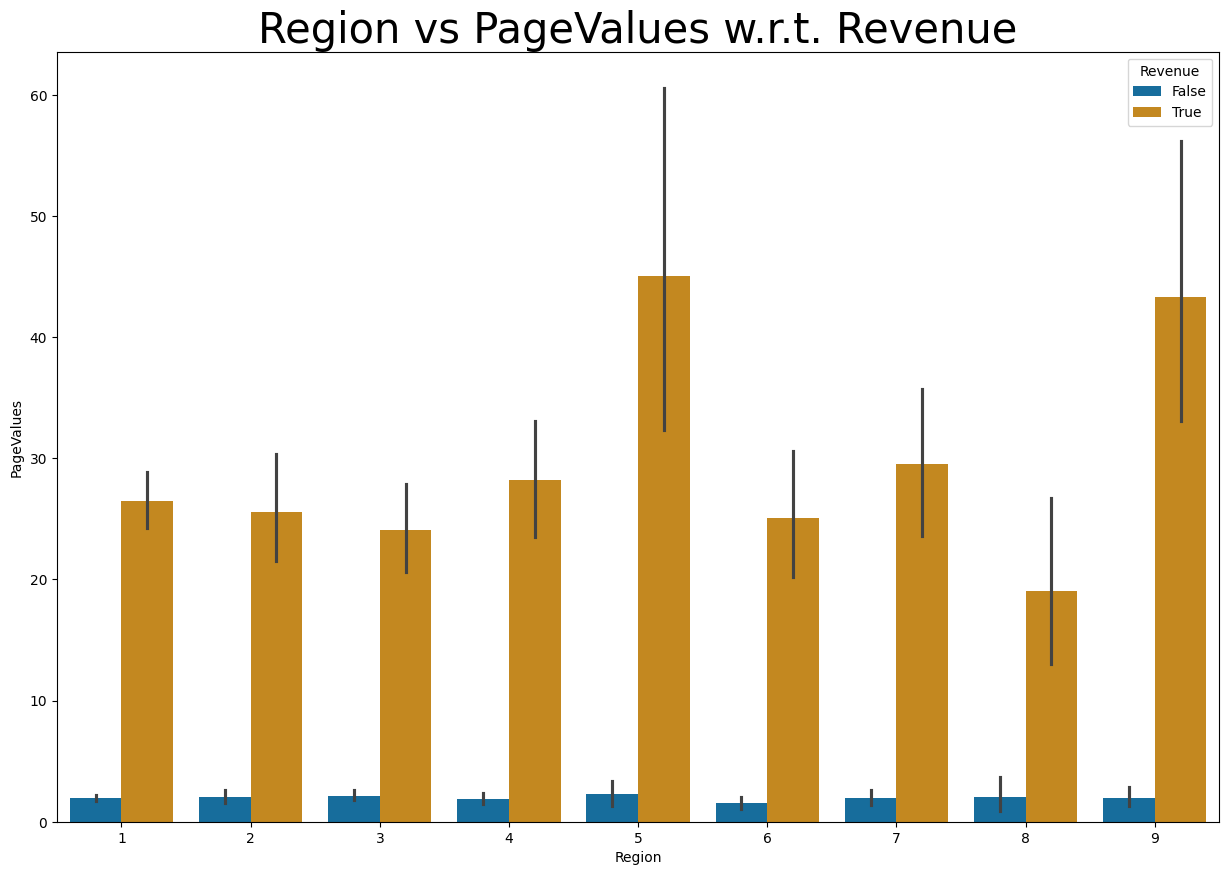

In [ ]:
# region vs pagevalues w.r.t. revenue

plt.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = data['Region'], y = data['PageValues'], hue = data['Revenue'], palette = 'colorblind')
plt.title('Region vs PageValues w.r.t. Revenue', fontsize = 30)
plt.show()

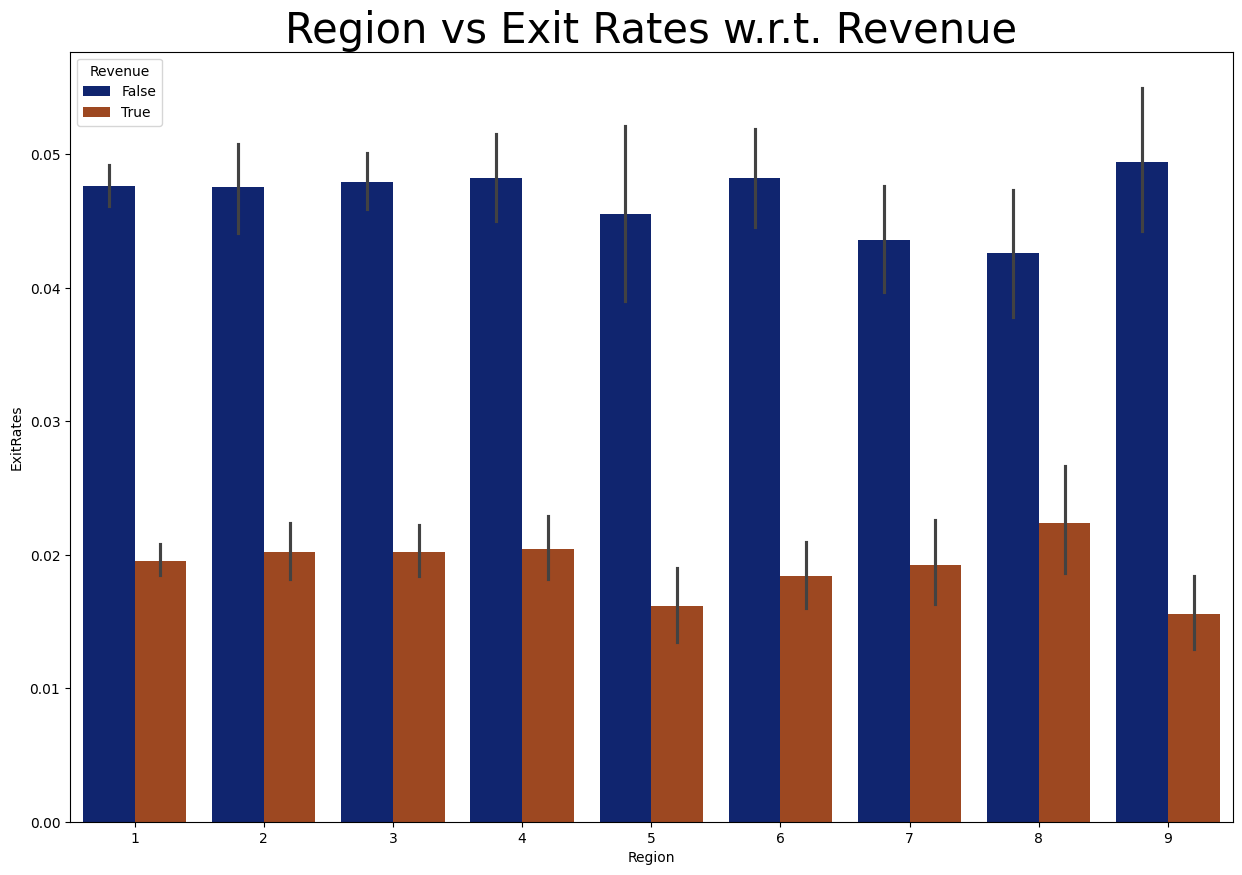

In [ ]:
# region vs exit rates w.r.t. revenue
plt.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = data['Region'], y = data['ExitRates'], hue = data['Revenue'], palette = 'dark')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)
plt.show()

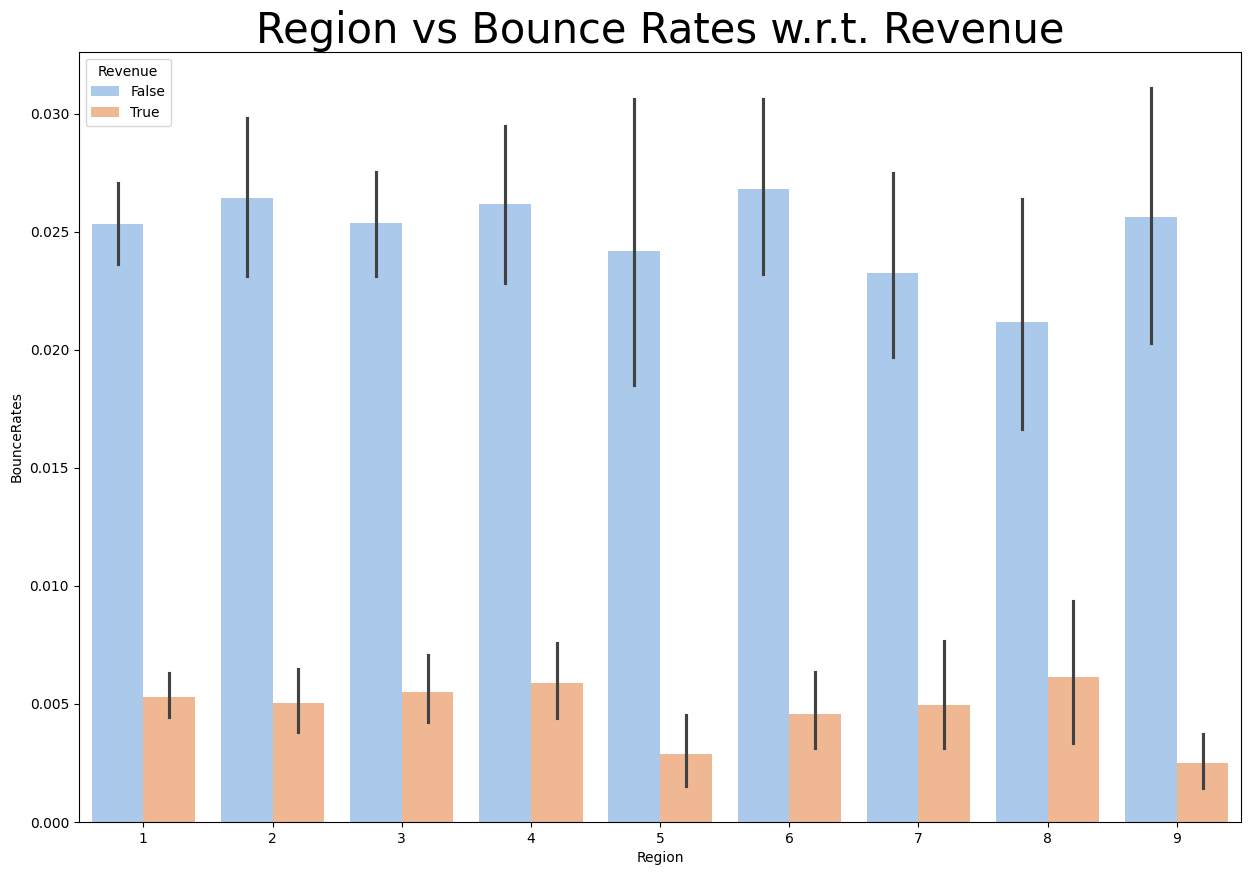

In [ ]:
# region vs Bounce rates wrt revenue
plt.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = data['Region'], y = data['BounceRates'], hue = data['Revenue'], palette = 'pastel')
plt.title('Region vs Bounce Rates w.r.t. Revenue', fontsize = 30)
plt.show()

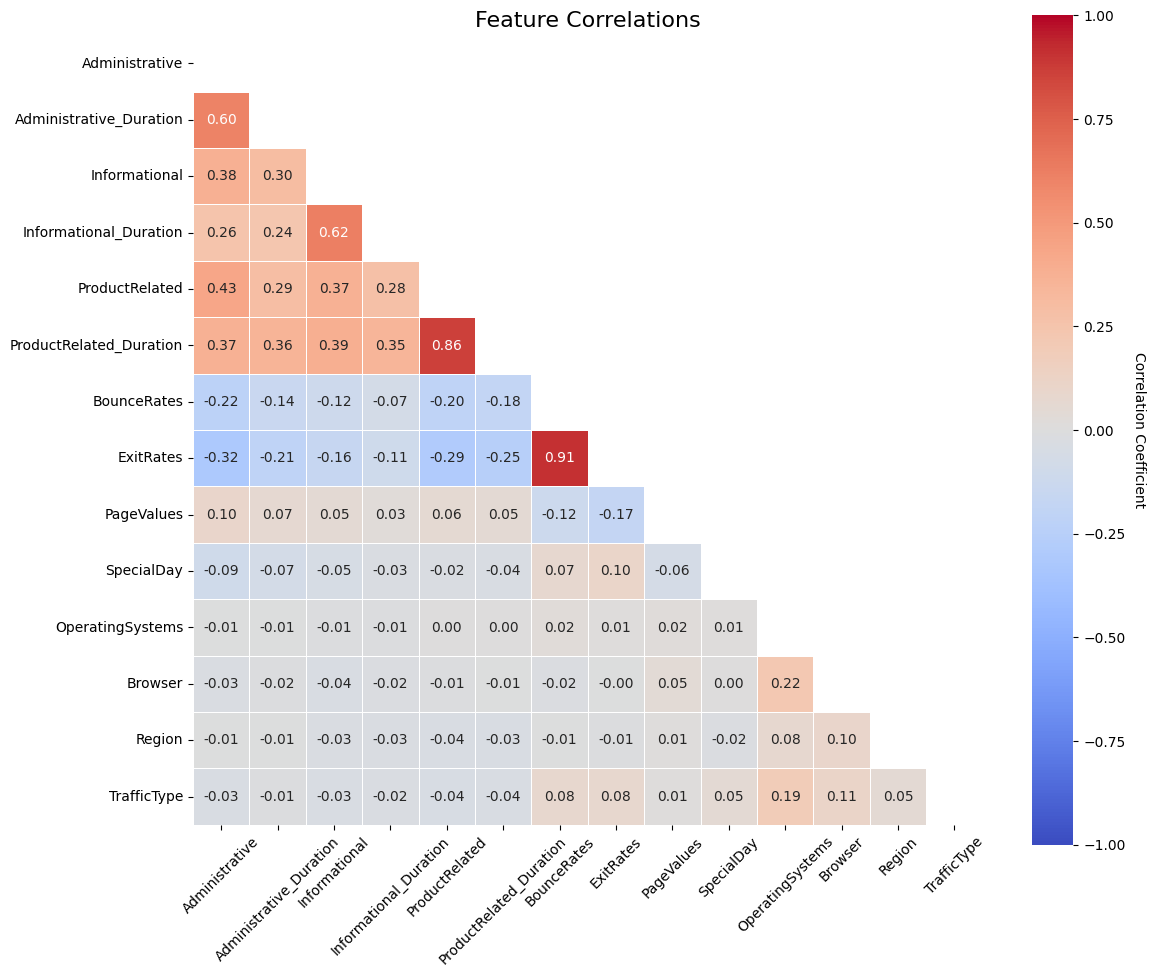

In [ ]:
# Select only numerical columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Format the plot
plt.title('Feature Correlations', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Optional: Add label to the colorbar
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15)

# Display the plot
plt.show()


In [ ]:
print(df.columns)  # See all available columns

Index([False, True], dtype='bool', name='Revenue')


In [ ]:
data.dtypes

,0
Administrative,int64
Administrative_Duration,float64
Informational,int64
Informational_Duration,float64
ProductRelated,int64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64
SpecialDay,float64


In [ ]:
# one hot encoding

data1 = pd.get_dummies(data)

In [ ]:
data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [ ]:
# label encoding of revenue

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

,count
Revenue,
0,10422
1,1908


In [ ]:
# getting dependent and independent variables

x = data1
y = data['Revenue']

In [ ]:
# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 29)
Shape of y: (12330,)


In [ ]:
# splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 29)
Shape of y_train : (8631,)
Shape of x_test : (3699, 29)
Shape of y_test : (3699,)


# MODEL BUILDING

In [ ]:
# standard scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = 'Revenue'
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
# SVC
from sklearn.svm import SVC
svc = SVC()

model = svc.fit(X_train,y_train)
y_svcpred = model.predict(X_test)

print('Accuracy of SVM:', accuracy_score(y_test, y_svcpred))

Accuracy of SVM: 0.8340091916734252


In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model = lr.fit(X_train,y_train)
y_lrpred = model.predict(X_test)

print('Accuracy of Logistic Regression:', accuracy_score(y_test, y_lrpred))

Accuracy of Logistic Regression: 0.8653690186536902


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)  # Adding random_state for reproducibility

# Train the model
model = dtc.fit(X_train, y_train)

# Predict on test set
y_dtcpred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_dtcpred)
print('Accuracy of Decision Tree Classifier:', accuracy)

Accuracy of Decision Tree Classifier: 0.8545552852122196


In [148]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)
model_ada = ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)

print('AdaBoost Classifier:', accuracy_score(y_test, y_pred_ada))

AdaBoost Classifier: 0.8637469586374696


In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Example: convert month column
month_mapping = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
                 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

if 'month' in X_train.columns:
    X_train['month'] = X_train['month'].map(month_mapping)
    X_test['month'] = X_test['month'].map(month_mapping)

# One-hot encode other categorical features
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns of train and test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict & Evaluate as before


RandomForestClassifier(random_state=42)

In [160]:
rfc = RandomForestClassifier()

model_rf = rfc.fit(X_train,y_train)
y_pred_rfc = model_rf.predict(X_test)

print('Accuracy of Random Forest Classifier:', accuracy_score(y_test, y_pred_rfc))

Accuracy of Random Forest Classifier: 0.9005136523384698


In [162]:
scores = [['SVC',83.0],['LogisticRegression',86.0],['Decision Tree',85.4],['AdaBoost',86.3],['RandomForest',90.7]]
comparison = pd.DataFrame(scores, columns = ['Algorithm', 'Accuracy'])

<ipython-input-163-00d8df532e2d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison['Algorithm'], y=comparison['Accuracy'], palette=colors)


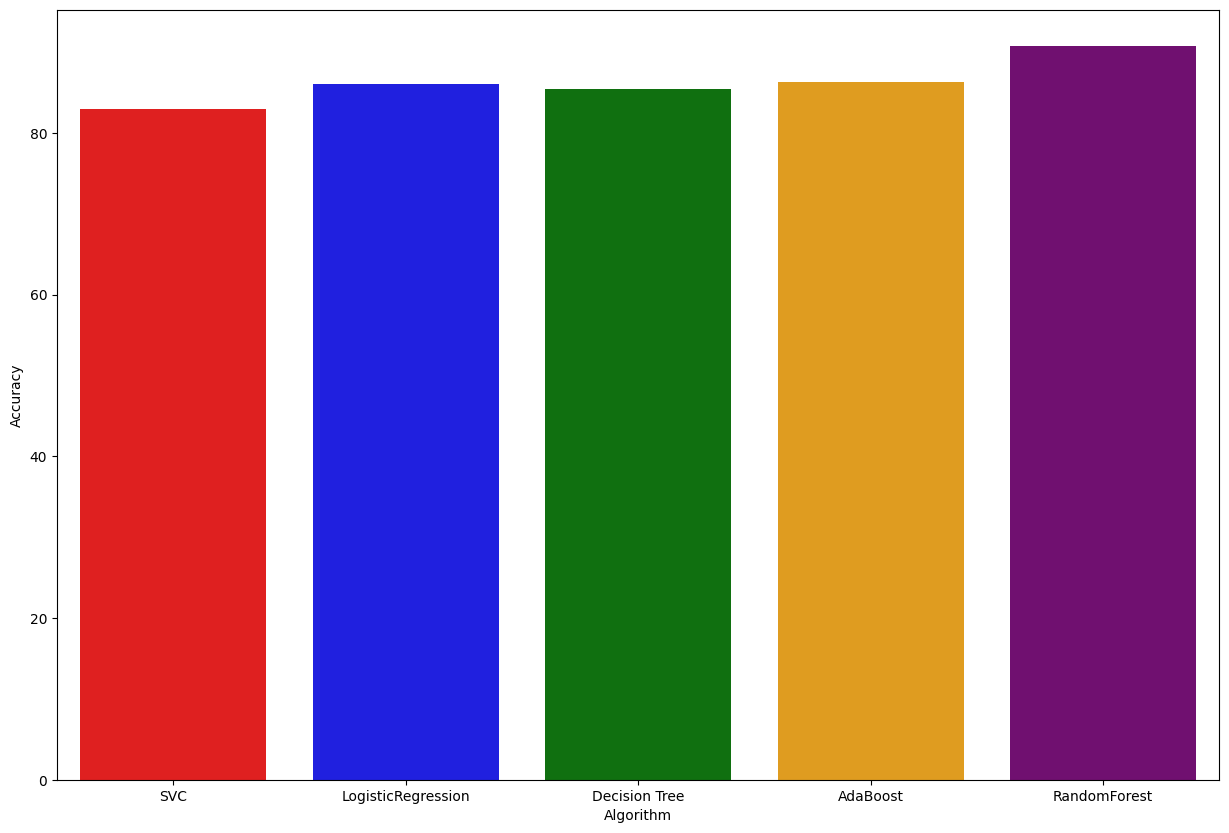

In [163]:
colors = ['red', 'blue', 'green', 'orange', 'purple']
sns.barplot(x=comparison['Algorithm'], y=comparison['Accuracy'], palette=colors)
plt.show()

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Define models with default hyperparameters
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVC": SVC(random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3124
           1       0.54      0.57      0.56       575

    accuracy                           0.86      3699
   macro avg       0.73      0.74      0.74      3699
weighted avg       0.86      0.86      0.86      3699

------------------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.71      0.55      0.62       575

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699

------------------------------------------------------------
Model: SVC
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3124
           1       0.88      0.01      0.02       575

    acc

In [169]:
#hyper parameter tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

base_estimator = DecisionTreeClassifier(random_state=42)
model = AdaBoostClassifier(estimator=base_estimator, random_state=42)

params = {
    'n_estimators': [50, 100],
    'estimator__max_depth': [1, 2, 3, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)

params = {'C':[0.1, 1, 10], 'kernel':['rbf', 'linear', 'poly'], 'gamma': [0.1, 0.001, 0.0001]}
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'estimator__max_depth': 2, 'n_estimators': 100}


In [170]:
# cross validation

from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)

print("Mean Accuracy :", cvs.mean())
print("Mean Standard Deviation :", cvs.std())

Mean Accuracy : 0.7519422449680271
Mean Standard Deviation : 0.012354325328718037
